<div class = "alert alert-block alert-danger">
<font color = 'black'><b><i><u><font size = 25>DIWALI  SALES  DATA  ANALYSIS</font></u></i></b></font>
</div>

<b>"Analyzing Diwali sales data involves examining key factors such as gender, age group, occupation, state, zone, and product category to identify purchasing patterns. By evaluating how these factors influence sales, businesses can optimize their marketing strategies, tailor product offerings, and better target specific customer segments to maximize sales during the Diwali season."</b>

<div class = "alert alert-block alert-success">
<font color = 'black'><b>Importing Required Libraries</b></font>
</div>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

<div class = "alert alert-block alert-success">
<font color = 'black'><b>Loading the DataSet</b></font>
</div>

In [5]:
df = pd.read_csv("C:/Users/Aman/Downloads/Diwali Sales Data.csv", encoding = 'unicode_escape')

<div class = "alert alert-block alert-success">
<font color = 'black'><b>Checking the Shape of DataSet</b></font>
</div>

In [7]:
df.shape

(11251, 15)

### Observation :
- There are total 15 columns available in the dataset.
- There are total 11251 rows available in the dataset.
       

<div class = "alert alert-block alert-success">
<font color = 'black'><b>Preview of Data</b></font>
</div>

In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Diwali Sales Dataset Description-

The Diwali sales dataset captures detailed customers data, including all product Id's and categories, customer demographics, and seasonal purchasing trends during the Diwali festival period.

Here is the Data Dictionary for Diwali sales dataset:

-  User_ID - ID name of a User
- Cust_name - Name of a Customer
- Product_ID - ID name of a Product
- Gender - Customer Gender
- Age Group	- Customer's Age Group
- Age - Age of a Customer
- Marital_Status - Marital Status of a Customer
- State	- State from where customer belongs
- Zone - Zone where customer lie
- Occupation - Customer's occupation
- Product_Category - Classification of items sold
- Orders - Number of orders placed by customers
- Amount - Amount paid by customers
- Status - Not available
- unnamed1 - Not define
    





<div class = "alert alert-block alert-success">
<font color = 'black'><b>Checking basic information of DataSet</b></font>
</div>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Observation:
- The columns dtypes are of mixtype i.e, float,object,int.
- Columns of float type = 64
- Columns of object type = 8
- Columns of int type = 4
- Memory occupied by this data is 1.3+ MB
- 'Amount' column have some missing values.
- 'Status' and 'unnamed1' having all null values.
- Columns 'User_ID' and 'Marital_Status' should not be in int dtypes ,so we have to convert them in object dtypes.

<div class = "alert alert-block alert-danger">
<font color = 'black'><b><i><u><font size = 5>PREPROCESSING</font></u></i></b></font>
</div>

### Dropping unrelated/blank columns from dataset :-

In [13]:
df.drop(["Status","unnamed1"], axis = 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


### Checking for null values :-

In [17]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

### Dropping null values :-

In [19]:
df.dropna(inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


### Changing Datatype :-

In [23]:
df["User_ID"] = df["User_ID"].astype('str')

In [25]:
df["Marital_Status"] = df["Marital_Status"].astype('str')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  object 
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  object 
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


### Renaming of columns :-

In [31]:
df.rename(columns = {"Orders":"No.of orders"})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,No.of orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


### Description of the data :-

In [33]:
df.describe(include = 'all')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
count,11239,11239,11239,11239,11239,11239.000000,11239,11239,11239,11239,11239,11239.000000,11239.000000
unique,3752,1250,2350,2,7,NaN,2,16,5,15,18,NaN,NaN
top,1001680,Vishakha,P00265242,F,26-35,NaN,0,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN
freq,24,42,53,7832,4541,NaN,6518,1944,4289,1583,2655,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,35.410357,NaN,NaN,NaN,NaN,NaN,2.489634,9453.610858
std,NaN,NaN,NaN,NaN,NaN,12.753866,NaN,NaN,NaN,NaN,NaN,1.114967,5222.355869
min,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,1.000000,188.000000
25%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,2.000000,5443.000000
50%,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,2.000000,8109.000000
75%,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,3.000000,12675.000000


### Insight :-
The dataset is now free of missing values, duplicates, and inconsistencies, with all categorical variables properly encoded and numerical values normalized, ready for visualization and further analysis.

<div class = "alert alert-block alert-danger">
<font color = 'black'><b><i><u><font size = 5>Exploratory Data Analysis</font></u></i></b></font>
</div>

## <b>Univariate Analysis</b> :-


<div class = "alert alert-block alert-info">
<font color = 'black'><b>1- Analysis on the basis of gender.</b></font>
</div>

In [35]:
df["Gender"].value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3824370745.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gen = sns.countplot(x = 'Gender', data = df, palette = "Dark2")


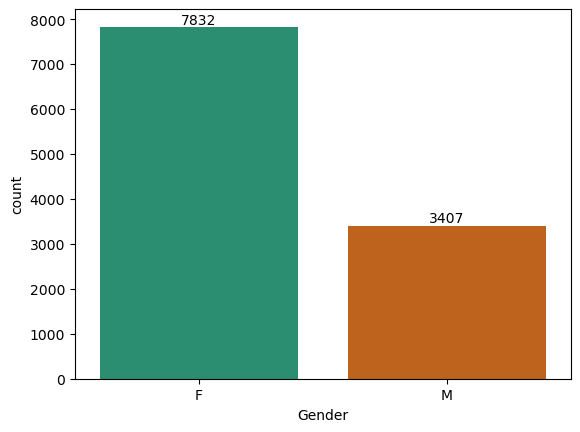

In [37]:
gen = sns.countplot(x = 'Gender', data = df, palette = "Dark2")

for bars in gen.containers:
    gen.bar_label(bars)

### Observation :-
The graph shows that the maximum number of individuals are female, with a higher frequency compared to male categories.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>2- Analysis on the basis of age group.</b></font>
</div>

In [39]:
ar = df["Age Group"].value_counts()
ar

Age Group
26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: count, dtype: int64

C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\331077720.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_grp = sns.countplot(x = 'Age Group', data = df, palette = "flare", order = ar.index)


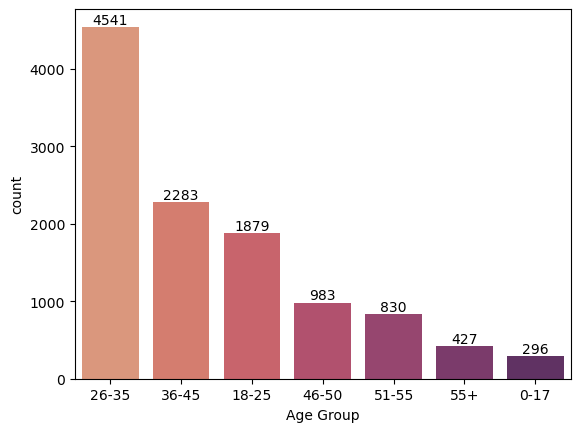

In [41]:
age_grp = sns.countplot(x = 'Age Group', data = df, palette = "flare", order = ar.index)

for bars in age_grp.containers:
    age_grp.bar_label(bars)

### Observation :-
The graph indicates that the age group 26-35 has the highest representation, surpassing all other age ranges.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>3- Analysis on the basis of Marital Status.</b></font>
</div>

In [43]:
df["Marital_Status"].value_counts()

Marital_Status
0    6518
1    4721
Name: count, dtype: int64

C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1734954995.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  marital = sns.countplot(x = 'Marital_Status', data = df, palette = "icefire")


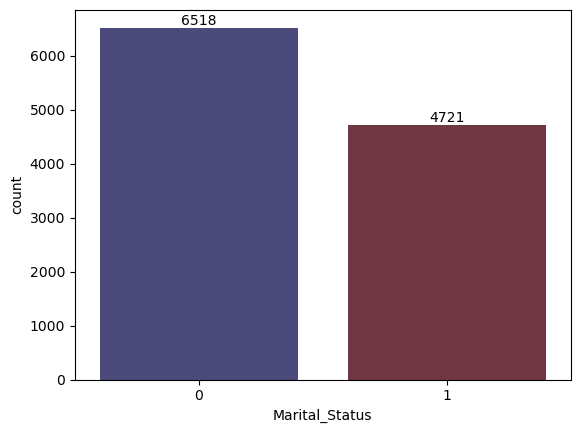

In [45]:
marital = sns.countplot(x = 'Marital_Status', data = df, palette = "icefire")

for bars in marital.containers:
    marital.bar_label(bars)

### Observation :-
The graph reveals that the majority of individuals are unmarried, as the count for "0" (unmarried) significantly exceeds that of "1" (married).

<div class = "alert alert-block alert-info">
<font color = 'black'><b>4- Analysis on the basis of State.</b></font>
</div>

In [47]:
st = df["State"].value_counts()
st

State
Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\89360063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  state = sns.countplot(x = 'State', data = df, palette = "seismic", order = st.index)


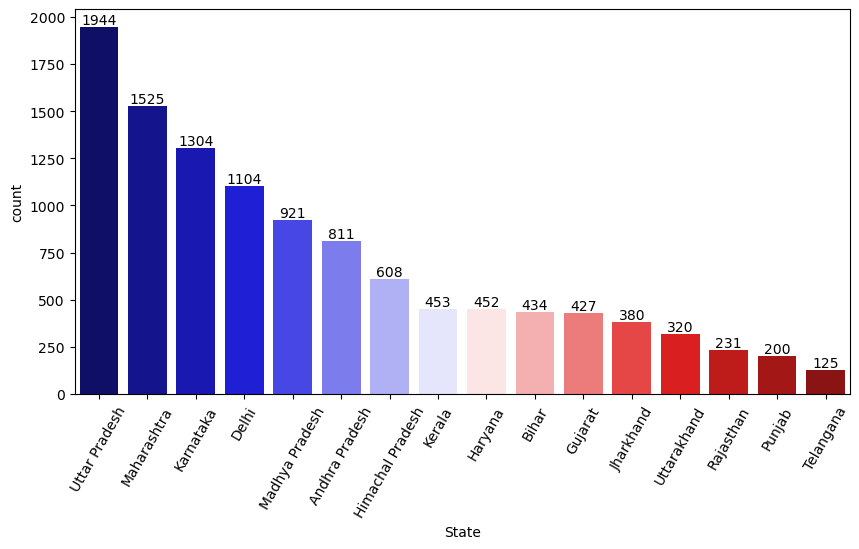

In [49]:
plt.figure(figsize = (10,5))
state = sns.countplot(x = 'State', data = df, palette = "seismic", order = st.index)
plt.xticks(rotation = 60)

for bars in state.containers:
    state.bar_label(bars)

### Observation :-
The graph shows that Uttar Pradesh has the highest representation, with more individuals from this state compared to others.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>5- Analysis on the basis of Zone.</b></font>
</div>

In [51]:
z = df["Zone"].value_counts()
z

Zone
Central     4289
Southern    2693
Western     1952
Northern    1491
Eastern      814
Name: count, dtype: int64

C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\4205774239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  zone = sns.countplot(x = 'Zone', data = df, palette = "rainbow", order = z.index)


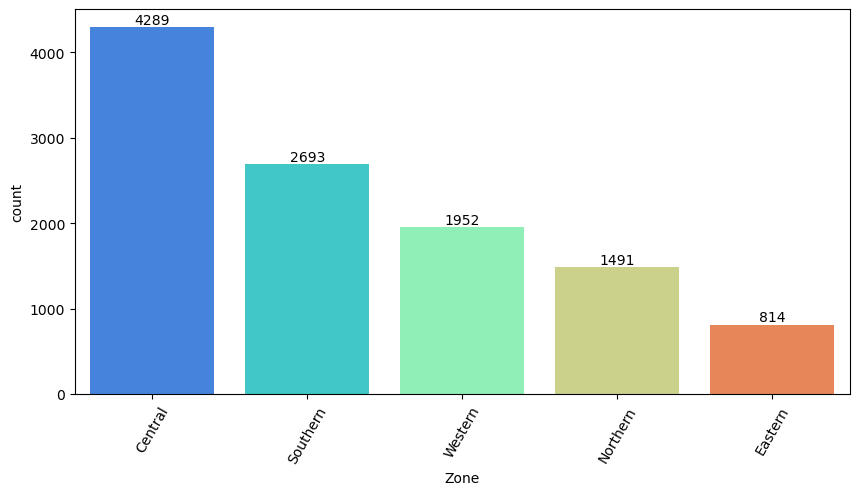

In [53]:
plt.figure(figsize = (10,5))
zone = sns.countplot(x = 'Zone', data = df, palette = "rainbow", order = z.index)
plt.xticks(rotation = 60)

for bars in zone.containers:
    zone.bar_label(bars)

### Observation :-
The graph shows that the Central zone has the highest representation, surpassing all other zones in frequency.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>6- Analysis on the basis of Occupation.</b></font>
</div>

In [55]:
O = df["Occupation"].value_counts()
O

Occupation
IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: count, dtype: int64

C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2786581688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  occup = sns.countplot(x = 'Occupation', data = df, palette = "viridis", order = O.index)


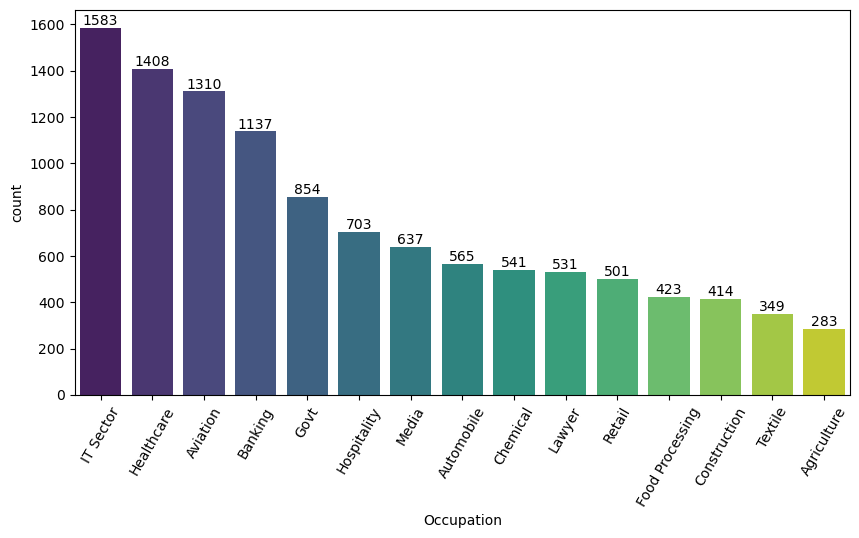

In [57]:
plt.figure(figsize = (10,5))
occup = sns.countplot(x = 'Occupation', data = df, palette = "viridis", order = O.index)
plt.xticks(rotation = 60)

for bars in occup.containers:
    occup.bar_label(bars)

### Observation :-
The graph indicates that the IT sector has the highest representation, with more individuals employed in this field compared to other occupations.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>7- Analysis on the basis of Product Category.</b></font>
</div>

In [59]:
PC = df["Product_Category"].value_counts()
PC

Product_Category
Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2836737194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Prodcat = sns.countplot(x = 'Product_Category', data = df, palette = "Set1", order = PC.index)


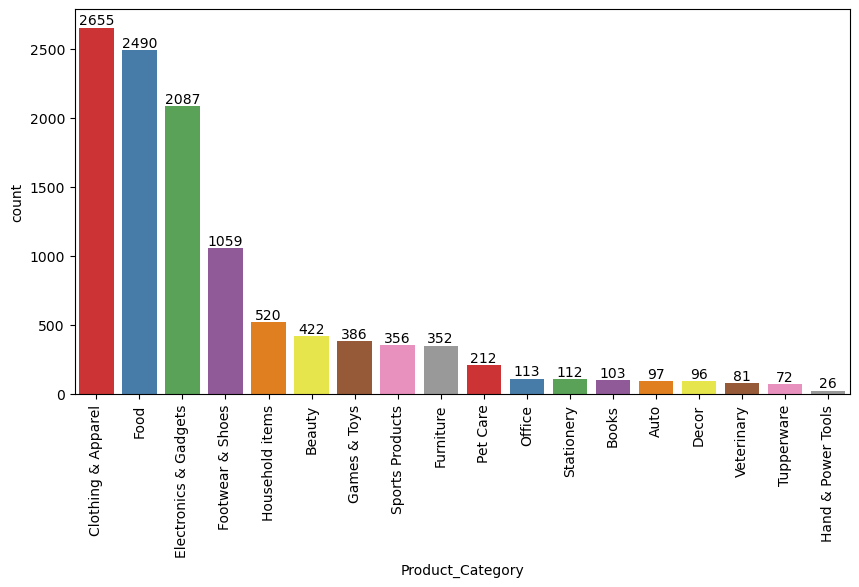

In [61]:
plt.figure(figsize = (10,5))
Prodcat = sns.countplot(x = 'Product_Category', data = df, palette = "Set1", order = PC.index)
plt.xticks(rotation = 90)

for bars in Prodcat.containers:
    Prodcat.bar_label(bars)

### Observation :-
The graph shows that Clothing and Apparel has the highest sales, outpacing all other product categories.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>8- Analysis on the basis of No. of Orders.</b></font>
</div>

In [63]:
Ord = df["Orders"].value_counts()
Ord

Orders
2    2893
1    2808
4    2773
3    2765
Name: count, dtype: int64

C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\4165795430.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  order = sns.countplot(x = 'Orders', data = df, palette = "rocket", order = Ord.index)


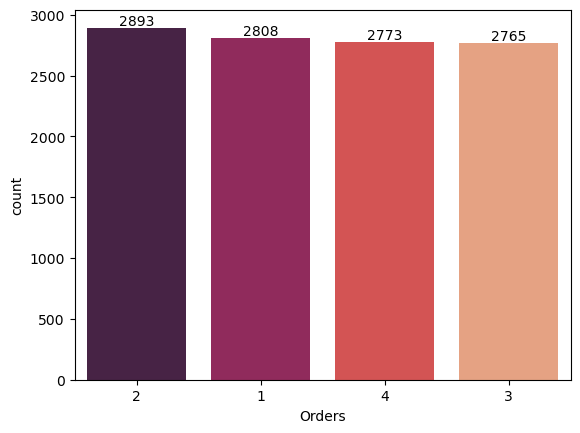

In [65]:
order = sns.countplot(x = 'Orders', data = df, palette = "rocket", order = Ord.index)
for bars in order.containers:
    order.bar_label(bars)

### Observation :-
The graph reveals that the highest number of orders placed corresponds to 2 orders, showing a peak in this category.

## <b>Bivariate Analysis</b> :- 

<div class = "alert alert-block alert-info">
<font color = 'black'><b>1- Analysis of gender on the basis of amount.</b></font>
</div>

In [67]:
gender_amt=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head()
gender_amt['Amount']=round(gender_amt['Amount']/1000000,2)
gender_amt

,Gender,Amount
0,F,74.34
1,M,31.91


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2694542823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  d=sns.barplot(x='Gender',y='Amount',data=gender_amt, palette = "pastel")


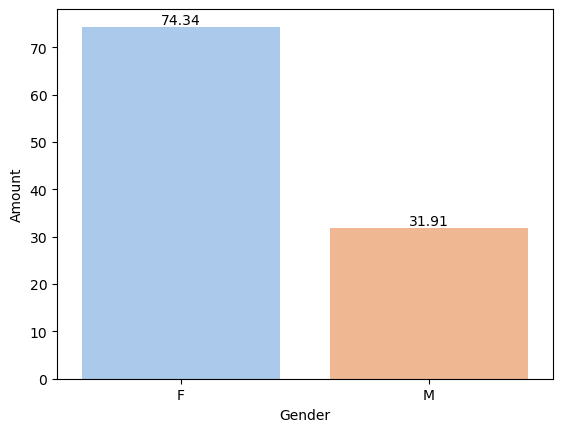

In [69]:
d=sns.barplot(x='Gender',y='Amount',data=gender_amt, palette = "pastel")
for i in d.containers:
    d.bar_label(i)

### Observation :-
The graph shows that the highest amount in millions is attributed to females, indicating a significant gender-based disparity in the data.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>2- Analysis of top 10 User ID on the basis of amount.</b></font>
</div>

In [71]:
Top_10_UID=df.groupby(["User_ID"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
Top_10_UID

,User_ID,Amount
1045,1001680,281034.0
1197,1001941,239147.0
2134,1003476,220435.0
1628,1002665,201104.0
2355,1003808,197660.0
2741,1004425,194343.0
2226,1003618,189921.0
274,1000424,187679.0
2897,1004682,185122.0
807,1001298,184045.0


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\655054500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  e=sns.barplot(x='User_ID',y='Amount', data=Top_10_UID, palette="Set1")


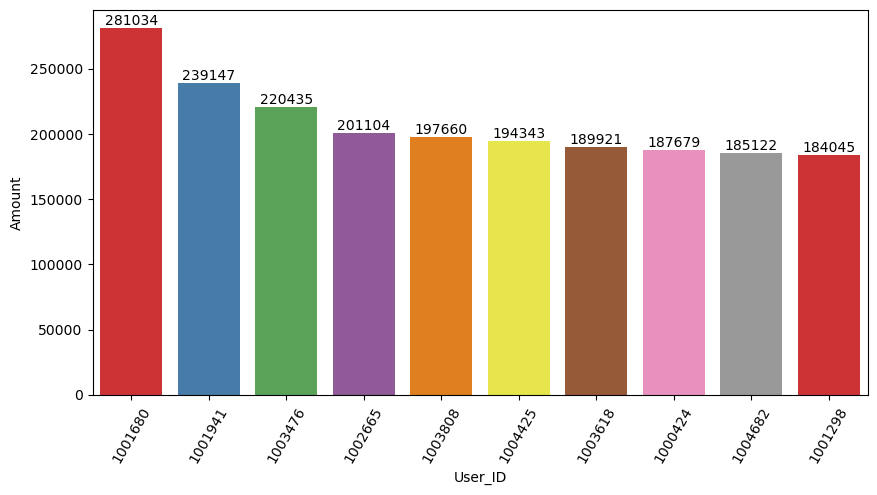

In [73]:
plt.figure(figsize=(10,5))
e=sns.barplot(x='User_ID',y='Amount', data=Top_10_UID, palette="Set1")
plt.xticks(rotation=60)
for i in e.containers:
    e.bar_label(i)

### Observation :-
The graph shows a clear correlation between the top 10 user IDs and the amounts in millions, with a noticeable disparity where a few user IDs dominate the total amount.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>3- Analysis of top 10 customer name on the basis of amount.</b></font>
</div>

In [75]:
Cust_name_amt = df.groupby(["Cust_name"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
Cust_name_amt

,Cust_name,Amount
1196,Vishakha,382782.0
1102,Sudevi,287142.0
1185,Vasudev,281034.0
800,Neola,275234.0
28,Alejandro,272517.0
2,Aastha,266961.0
1049,Shreyshi,265603.0
491,Hazel,242343.0
24,Akshat,241349.0
446,Gopal,239147.0


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3369498409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f=sns.barplot(x='Cust_name',y='Amount', data=Cust_name_amt,  palette="Set1")


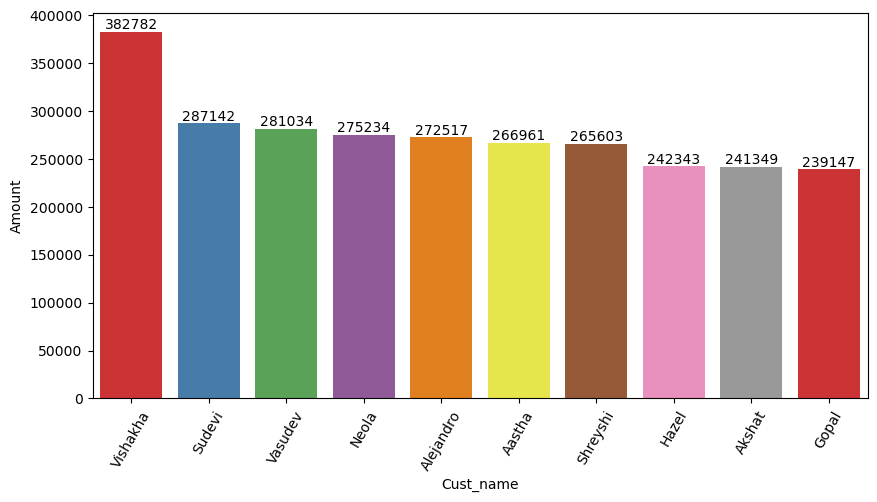

In [103]:
plt.figure(figsize=(10,5))
f=sns.barplot(x='Cust_name',y='Amount', data=Cust_name_amt,  palette="Set1")
plt.xticks(rotation=60)
for i in f.containers:
    f.bar_label(i)


### Observation :-
The graph indicates that Vishakha has the highest amount in millions among the top 10 customer names, highlighting her significant contribution.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>4- Analysis of age-group on the basis of amount.</b></font>
</div>

In [79]:
age_grp_amt=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
age_grp_amt['Amount']=round(age_grp_amt['Amount']/1000000,2)
age_grp_amt


,Age Group,Amount
2,26-35,42.61
3,36-45,22.14
1,18-25,17.24
4,46-50,9.21
5,51-55,8.26
6,55+,4.08
0,0-17,2.70


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1330515486.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f=sns.barplot(x="Age Group",y="Amount", data=age_grp_amt, palette="BrBG_r")


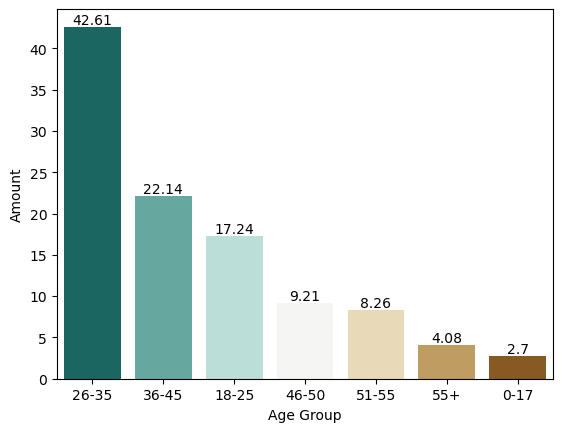

In [83]:
f=sns.barplot(x="Age Group",y="Amount", data=age_grp_amt, palette="BrBG_r")
for i in f.containers:
    f.bar_label(i)

### Observation :-
The graph shows that the age group 26-35 has the highest amount in millions, indicating a dominant contribution from this demographic.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>5- Analysis of top 10 State on the basis of amount.</b></font>
</div>

In [93]:
state_amt=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
state_amt['Amount']=round(state_amt['Amount']/1000000,2)
state_amt

,State,Amount
14,Uttar Pradesh,19.37
10,Maharashtra,14.43
7,Karnataka,13.52
2,Delhi,11.60
9,Madhya Pradesh,8.10
0,Andhra Pradesh,8.04
5,Himachal Pradesh,4.96
4,Haryana,4.22
1,Bihar,4.02
3,Gujarat,3.95


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3852827456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x='State',y='Amount', data=state_amt,  palette="husl")


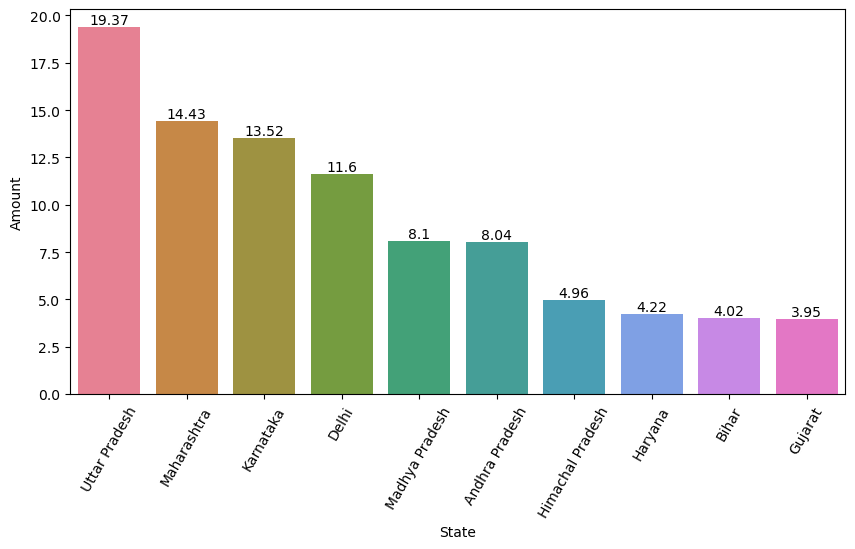

In [101]:
plt.figure(figsize=(10,5))
g=sns.barplot(x='State',y='Amount', data=state_amt,  palette="husl")
plt.xticks(rotation=60)
for i in g.containers:
    g.bar_label(i)

### Observation :-
The graph reveals that Uttar Pradesh has the highest amount in millions, indicating it as the leading contributor among the states.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>6- Analysis of Zone on the basis of amount.</b></font>
</div>

In [110]:
zone_amt=df.groupby(["Zone"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
zone_amt['Amount']=round(zone_amt['Amount']/1000000,2)
zone_amt

,Zone,Amount
0,Central,41.60
3,Southern,26.61
4,Western,18.37
2,Northern,12.62
1,Eastern,7.05


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\204322956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  h=sns.barplot(x='Zone',y='Amount', data=zone_amt,  palette="mako")


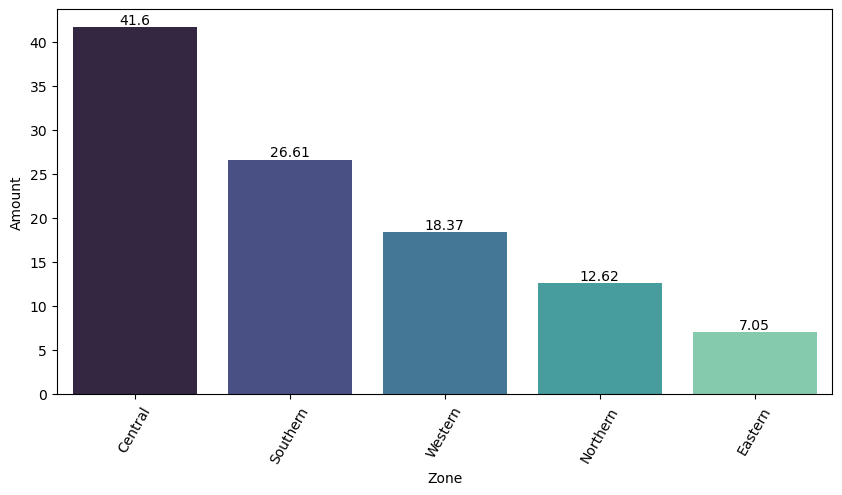

In [112]:
plt.figure(figsize=(10,5))
h=sns.barplot(x='Zone',y='Amount', data=zone_amt,  palette="mako")
plt.xticks(rotation=60)
for i in h.containers:
    h.bar_label(i)

### Observation :-
The graph shows that the Central Zone has the highest amount in millions, making it the leading zone in terms of contribution.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>7- Analysis of top 10 Occupation on the basis of amount.</b></font>
</div>

In [119]:
occup_amt=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
occup_amt['Amount']=round(occup_amt['Amount']/1000000,2)
occup_amt

,Occupation,Amount
10,IT Sector,14.76
8,Healthcare,13.03
2,Aviation,12.60
3,Banking,10.77
7,Govt,8.52
9,Hospitality,6.38
12,Media,6.30
1,Automobile,5.37
4,Chemical,5.30
11,Lawyer,4.98


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2325585448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  o=sns.barplot(x='Occupation',y='Amount', data=occup_amt,  palette="rocket")


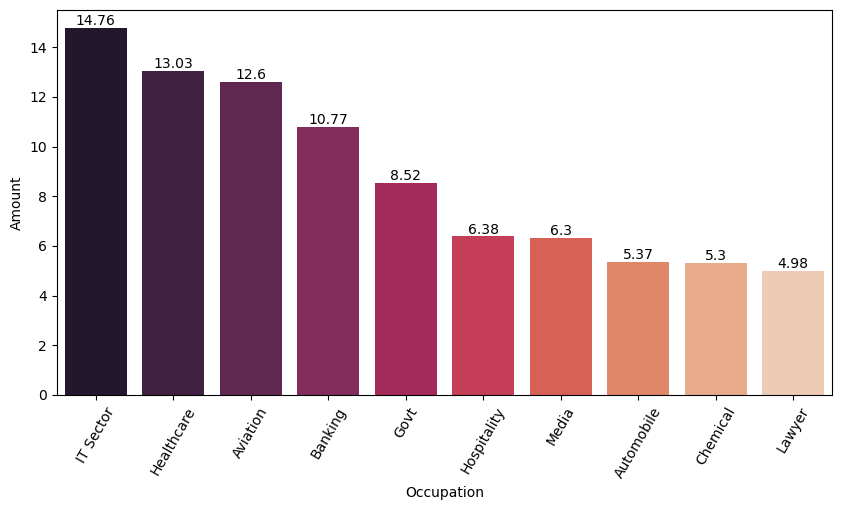

In [121]:
plt.figure(figsize=(10,5))
o=sns.barplot(x='Occupation',y='Amount', data=occup_amt,  palette="rocket")
plt.xticks(rotation=60)
for i in o.containers:
    o.bar_label(i)

### Observation :-
The graph shows that the IT sector has the highest amount in millions, indicating its dominant contribution among various occupations.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>8- Analysis of top 10 product category on the basis of amount.</b></font>
</div>

In [127]:
prod_amt=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
prod_amt['Amount']=round(prod_amt['Amount']/1000000,2)
prod_amt

,Product_Category,Amount
6,Food,33.93
3,Clothing & Apparel,16.50
5,Electronics & Gadgets,15.64
7,Footwear & Shoes,15.58
8,Furniture,5.44
9,Games & Toys,4.33
14,Sports Products,3.64
1,Beauty,1.96
0,Auto,1.96
15,Stationery,1.68


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\904702957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p=sns.barplot(x='Product_Category',y='Amount', data=prod_amt,  palette="Spectral")


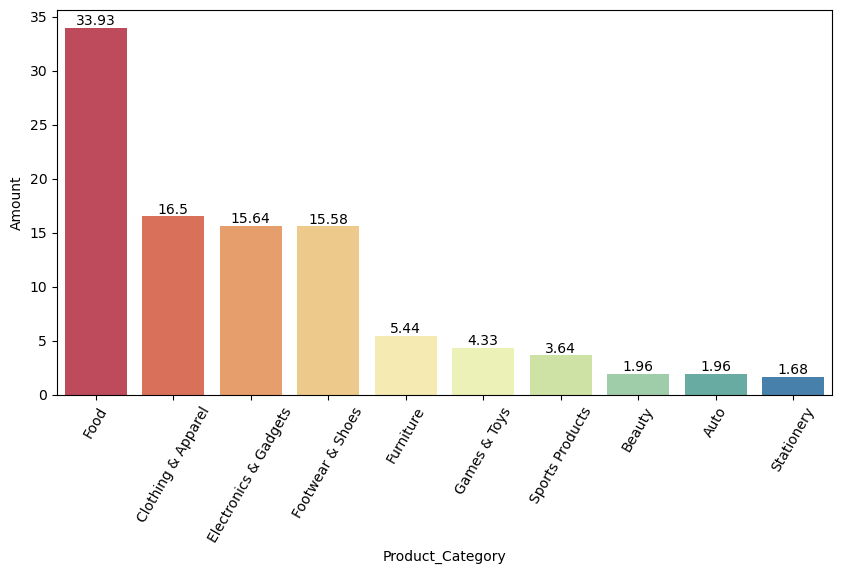

In [131]:
plt.figure(figsize=(10,5))
p=sns.barplot(x='Product_Category',y='Amount', data=prod_amt,  palette="Spectral")
plt.xticks(rotation=60)
for i in p.containers:
    p.bar_label(i)

### Observation :-
The graph reveals that the food product category has the highest amount in millions, making it the leading contributor among all categories.

## <b>Multivariate Analysis</b> :- 

<div class = "alert alert-block alert-info">
<font color = 'black'><b>1- Analysis of gender with age group on the basis of amount.</b></font>
</div>

In [179]:
df["Gender_age"]=df["Gender"]+"_"+df["Age Group"]

In [183]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35


In [185]:
gender_age_amt=df.groupby(["Gender_age"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gender_age_amt['Amount']=round(gender_age_amt['Amount']/1000000,2)
gender_age_amt

,Gender_age,Amount
2,F_26-35,30.96
3,F_36-45,15.51
1,F_18-25,11.89
9,M_26-35,11.65
4,F_46-50,6.74
10,M_36-45,6.64
5,F_51-55,5.39
8,M_18-25,5.35
12,M_51-55,2.88
11,M_46-50,2.46


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2047226109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  m=sns.barplot(x='Gender_age',y='Amount', data=gender_age_amt,  palette="vlag")


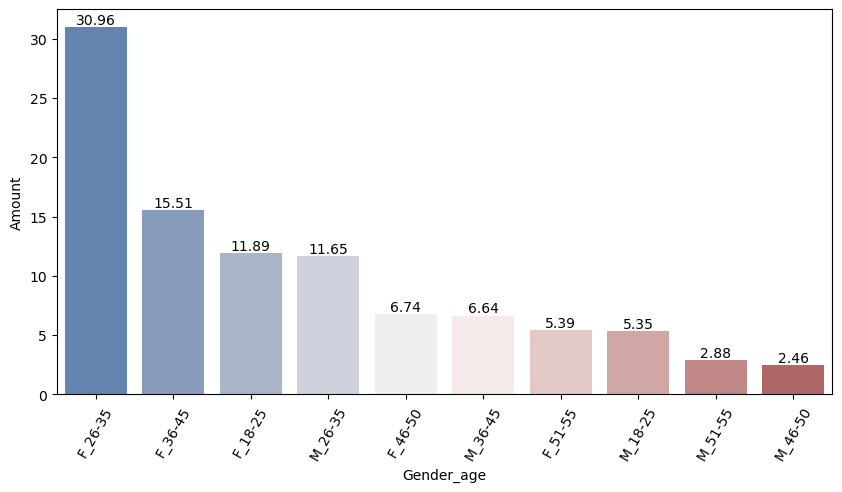

In [187]:
plt.figure(figsize=(10,5))
m=sns.barplot(x='Gender_age',y='Amount', data=gender_age_amt,  palette="vlag")
plt.xticks(rotation=60)
for i in m.containers:
    m.bar_label(i)

### Observation :-
The graph shows that females in the 26-35 age group contribute the highest amount in millions, highlighting their significant financial impact.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>2- Analysis of gender with marital status on the basis of amount.</b></font>
</div>

In [189]:
df["Gender_Marital_Status"]=df["Gender"]+"_"+df["Marital_Status"]

In [191]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1


In [195]:
gender_marital_amt=df.groupby(["Gender_Marital_Status"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
gender_marital_amt['Amount']=round(gender_marital_amt['Amount']/1000000,2)
gender_marital_amt

,Gender_Marital_Status,Amount
0,F_0,43.79
1,F_1,30.55
2,M_0,18.34
3,M_1,13.57


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1139890278.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gm=sns.barplot(x='Gender_Marital_Status',y='Amount', data=gender_marital_amt,  palette="Set1")


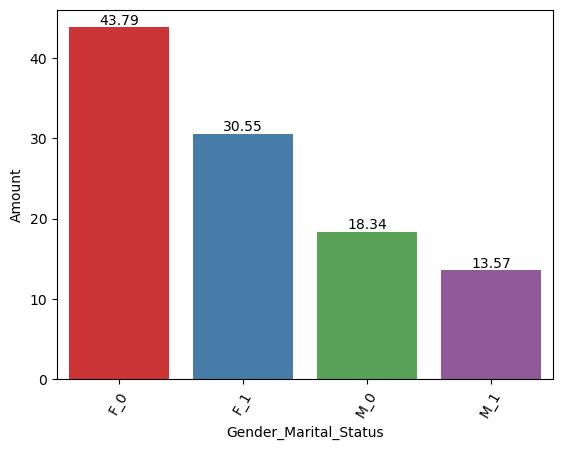

In [199]:
gm=sns.barplot(x='Gender_Marital_Status',y='Amount', data=gender_marital_amt,  palette="Set1")
plt.xticks(rotation=60)
for i in gm.containers:
    gm.bar_label(i)

### Observation :-
The graph shows that unmarried females (marital status 0) contribute the highest amount in millions, indicating their dominant financial impact.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>3- Analysis of gender with state on the basis of amount.</b></font>
</div>

In [205]:
df["Gender_State"]=df["Gender"]+"_"+df["State"]

In [207]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat


In [209]:
gender_state_amt=df.groupby(["Gender_State"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gender_state_amt['Amount']=round(gender_state_amt['Amount']/1000000,2)
gender_state_amt

,Gender_State,Amount
14,F_Uttar Pradesh,13.66
10,F_Maharashtra,10.56
7,F_Karnataka,9.93
2,F_Delhi,8.26
30,M_Uttar Pradesh,5.71
0,F_Andhra Pradesh,5.51
9,F_Madhya Pradesh,5.30
26,M_Maharashtra,3.87
23,M_Karnataka,3.59
18,M_Delhi,3.34


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3826359139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gs=sns.barplot(x='Gender_State',y='Amount', data=gender_state_amt,  palette="viridis")


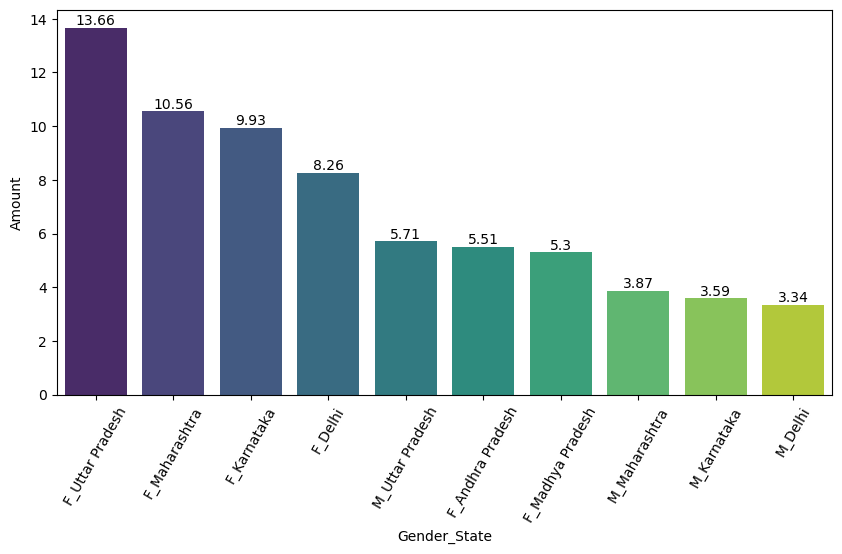

In [211]:
plt.figure(figsize=(10,5))
gs=sns.barplot(x='Gender_State',y='Amount', data=gender_state_amt,  palette="viridis")
plt.xticks(rotation=60)
for i in gs.containers:
    gs.bar_label(i)

### Observation :-
The graph shows that females from Uttar Pradesh contribute the highest amount in millions, making them the leading demographic in this state.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>4- Analysis of gender with zone on the basis of amount.</b></font>
</div>

In [215]:
df["Gender_Zone"]=df["Gender"]+"_"+df["Zone"]

In [217]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western


In [219]:
gender_zone_amt=df.groupby(["Gender_Zone"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
gender_zone_amt['Amount']=round(gender_zone_amt['Amount']/1000000,2)
gender_zone_amt

,Gender_Zone,Amount
0,F_Central,28.82
3,F_Southern,18.79
4,F_Western,13.39
5,M_Central,12.78
2,F_Northern,8.56
8,M_Southern,7.81
9,M_Western,4.98
1,F_Eastern,4.77
7,M_Northern,4.06
6,M_Eastern,2.28


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2663434688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gz=sns.barplot(x='Gender_Zone',y='Amount', data=gender_zone_amt,  palette="Paired")


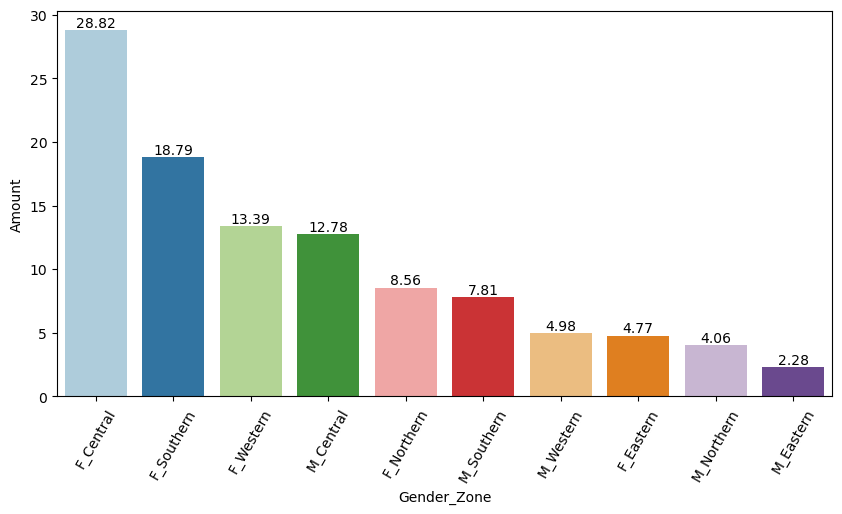

In [221]:
plt.figure(figsize=(10,5))
gz=sns.barplot(x='Gender_Zone',y='Amount', data=gender_zone_amt,  palette="Paired")
plt.xticks(rotation=60)
for i in gz.containers:
    gz.bar_label(i)

### Observation :-
The graph shows that females from the Central Zone contribute the highest amount in millions, highlighting their dominant financial impact in this zone.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>5- Analysis of gender with occupation on the basis of amount.</b></font>
</div>

In [225]:
df["Gender_Occupation"]=df["Gender"]+"_"+df["Occupation"]

In [227]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing


In [229]:
gender_occup_amt=df.groupby(["Gender_Occupation"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gender_occup_amt['Amount']=round(gender_occup_amt['Amount']/1000000,2)
gender_occup_amt

,Gender_Occupation,Amount
10,F_IT Sector,10.18
2,F_Aviation,9.01
8,F_Healthcare,8.97
3,F_Banking,7.79
7,F_Govt,6.00
25,M_IT Sector,4.57
12,F_Media,4.38
9,F_Hospitality,4.18
23,M_Healthcare,4.07
1,F_Automobile,3.77


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\4249587026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  go=sns.barplot(x='Gender_Occupation',y='Amount', data=gender_occup_amt,  palette="hls")


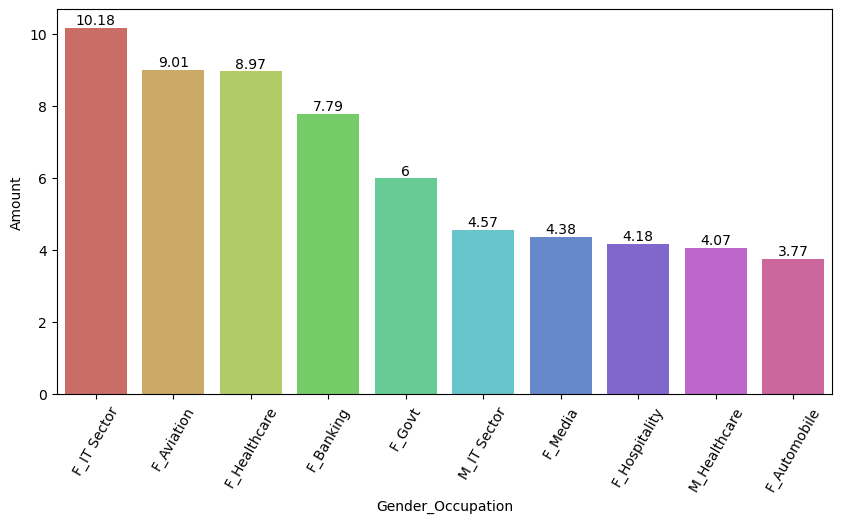

In [231]:
plt.figure(figsize=(10,5))
go=sns.barplot(x='Gender_Occupation',y='Amount', data=gender_occup_amt,  palette="hls")
plt.xticks(rotation=60)
for i in go.containers:
    go.bar_label(i)

### Observation :-
The graph shows that females in the IT sector contribute the highest amount in millions, indicating their significant financial influence in this occupation.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>6- Analysis of gender with product category on the basis of amount.</b></font>
</div>

In [235]:
df["Gender_Product"]=df["Gender"]+"_"+df["Product_Category"]

In [237]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto


In [239]:
gender_prod_amt=df.groupby(["Gender_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gender_prod_amt['Amount']=round(gender_prod_amt['Amount']/1000000,2)
gender_prod_amt

,Gender_Product,Amount
6,F_Food,24.18
7,F_Footwear & Shoes,11.53
3,F_Clothing & Apparel,11.48
5,F_Electronics & Gadgets,11.03
24,M_Food,9.76
21,M_Clothing & Apparel,5.02
23,M_Electronics & Gadgets,4.61
25,M_Footwear & Shoes,4.04
8,F_Furniture,3.39
9,F_Games & Toys,3.05


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\804192572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gp=sns.barplot(x='Gender_Product',y='Amount', data=gender_prod_amt,  palette="Set2")


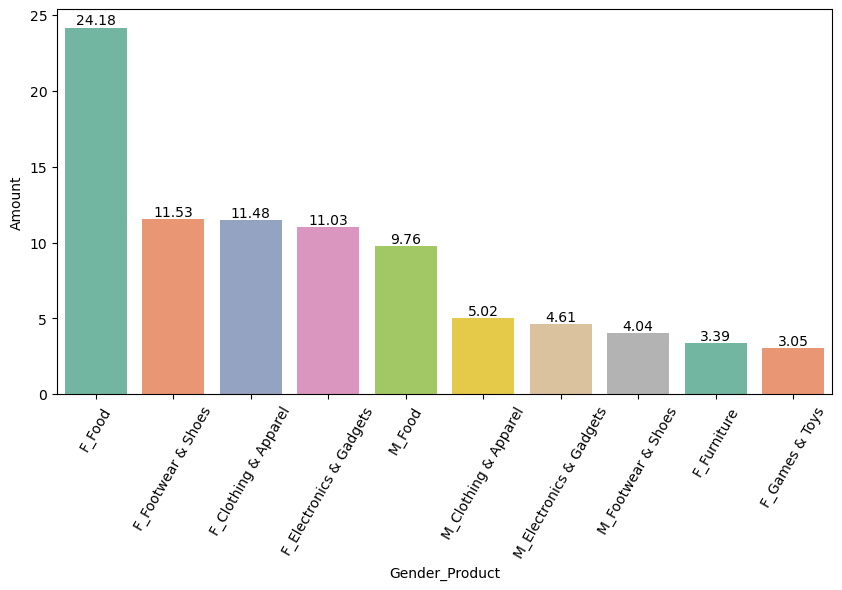

In [243]:
plt.figure(figsize=(10,5))
gp=sns.barplot(x='Gender_Product',y='Amount', data=gender_prod_amt,  palette="Set2")
plt.xticks(rotation=60)
for i in gp.containers:
    gp.bar_label(i)

### Observation :-
The graph shows that females in the food product category contribute the highest amount in millions, making them the leading demographic in this category.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>7- Analysis of age group with marital status on the basis of amount.</b></font>
</div>

In [245]:
df["Agegrp_Marital"]=df["Age Group"]+"_"+df["Marital_Status"]

In [247]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1


In [251]:
age_marital_amt=df.groupby(["Agegrp_Marital"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
age_marital_amt['Amount']=round(age_marital_amt['Amount']/1000000,2)
age_marital_amt

,Agegrp_Marital,Amount
4,26-35_0,25.01
5,26-35_1,17.60
6,36-45_0,12.87
2,18-25_0,9.78
7,36-45_1,9.27
3,18-25_1,7.46
8,46-50_0,5.47
10,51-55_0,4.88
9,46-50_1,3.74
11,51-55_1,3.38


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1092427947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  am=sns.barplot(x='Agegrp_Marital',y='Amount', data=age_marital_amt,  palette="BrBG")


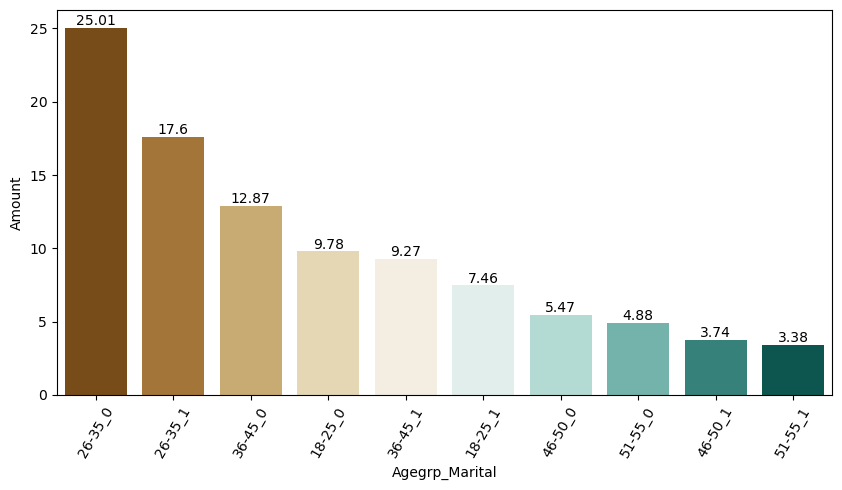

In [253]:
plt.figure(figsize=(10,5))
am=sns.barplot(x='Agegrp_Marital',y='Amount', data=age_marital_amt,  palette="BrBG")
plt.xticks(rotation=60)
for i in am.containers:
    am.bar_label(i)

### Observation :-
The graph shows that the 26-35 age group with marital status 0 (unmarried) contributes the highest amount in millions, indicating a significant financial presence in this category.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>8- Analysis of age group with state on the basis of amount.</b></font>
</div>

In [259]:
df["Agegrp_State"]=df["Age Group"]+"_"+df["State"]

In [261]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat


In [263]:
age_state_amt=df.groupby(["Agegrp_State"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
age_state_amt['Amount']=round(age_state_amt['Amount']/1000000,2)
age_state_amt

,Agegrp_State,Amount
46,26-35_Uttar Pradesh,7.67
42,26-35_Maharashtra,5.99
39,26-35_Karnataka,5.47
34,26-35_Delhi,4.93
62,36-45_Uttar Pradesh,3.86
30,18-25_Uttar Pradesh,3.32
55,36-45_Karnataka,3.25
32,26-35_Andhra Pradesh,3.16
50,36-45_Delhi,3.01
41,26-35_Madhya Pradesh,2.89


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2527930104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sa=sns.barplot(x='Agegrp_State',y='Amount', data=age_state_amt,  palette="CMRmap")


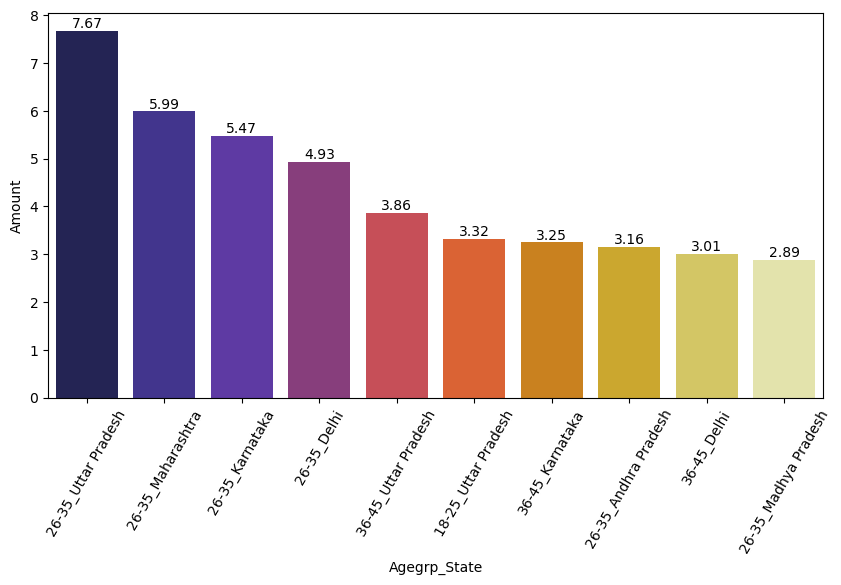

In [265]:
plt.figure(figsize=(10,5))
sa=sns.barplot(x='Agegrp_State',y='Amount', data=age_state_amt,  palette="CMRmap")
plt.xticks(rotation=60)
for i in sa.containers:
    sa.bar_label(i)

### Observation :-
The graph shows that the 26-35 age group from Uttar Pradesh contributes the highest amount in millions, highlighting their dominant financial impact in the state.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>9- Analysis of age group with zone on the basis of amount.</b></font>
</div>

In [269]:
df["Agegrp_Zone"]=df["Age Group"]+"_"+df["Zone"]

In [271]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western


In [273]:
age_zone_amt=df.groupby(["Agegrp_Zone"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
age_zone_amt['Amount']=round(age_zone_amt['Amount']/1000000,2)
age_zone_amt

,Agegrp_Zone,Amount
10,26-35_Central,16.38
13,26-35_Southern,10.75
15,36-45_Central,9.01
14,26-35_Western,7.57
5,18-25_Central,6.54
18,36-45_Southern,5.84
12,26-35_Northern,5.09
8,18-25_Southern,4.20
20,46-50_Central,3.85
19,36-45_Western,3.37


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\721576646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  az=sns.barplot(x='Agegrp_Zone',y='Amount', data=age_zone_amt,  palette="GnBu")


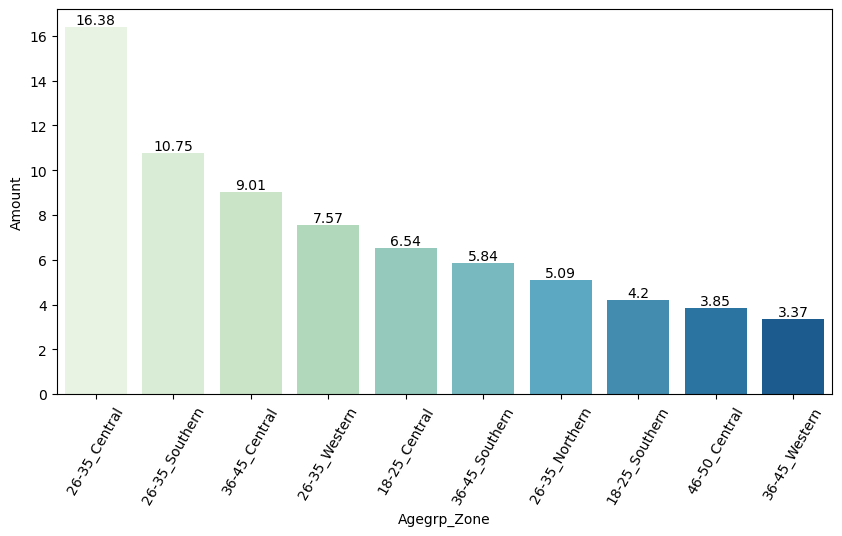

In [275]:
plt.figure(figsize=(10,5))
az=sns.barplot(x='Agegrp_Zone',y='Amount', data=age_zone_amt,  palette="GnBu")
plt.xticks(rotation=60)
for i in az.containers:
    az.bar_label(i)

### Observation :-
The graph shows that the 26-35 age group from the Central Zone contributes the highest amount in millions, indicating their leading financial influence in this zone.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>10- Analysis of age group with occupation on the basis of amount.</b></font>
</div>

In [279]:
df["Agegrp_Occupation"]=df["Age Group"]+"_"+df["Occupation"]

In [281]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing


In [283]:
age_occup_amt=df.groupby(["Agegrp_Occupation"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
age_occup_amt['Amount']=round(age_occup_amt['Amount']/1000000,2)
age_occup_amt

,Agegrp_Occupation,Amount
40,26-35_IT Sector,6.12
38,26-35_Healthcare,5.27
32,26-35_Aviation,5.26
33,26-35_Banking,4.59
37,26-35_Govt,3.11
55,36-45_IT Sector,2.98
53,36-45_Healthcare,2.61
47,36-45_Aviation,2.51
42,26-35_Media,2.46
39,26-35_Hospitality,2.40


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2950437722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ao=sns.barplot(x='Agegrp_Occupation',y='Amount', data=age_occup_amt,  palette="Dark2")


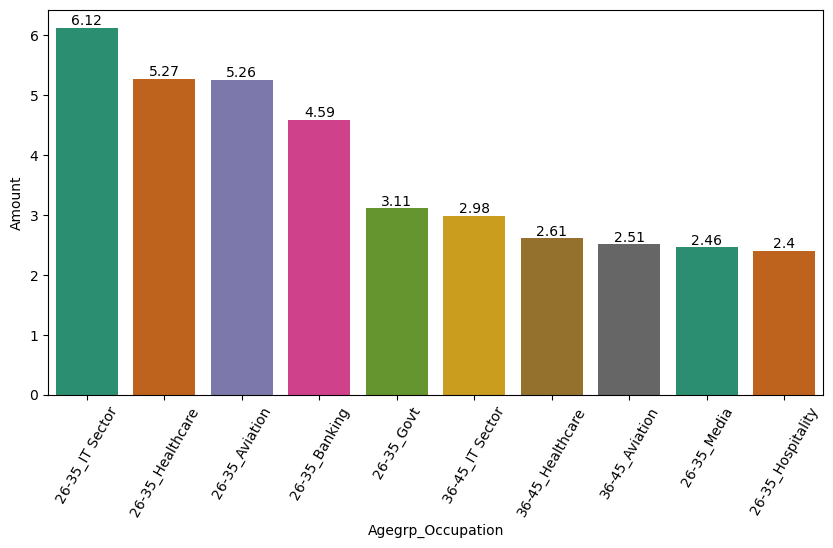

In [285]:
plt.figure(figsize=(10,5))
ao=sns.barplot(x='Agegrp_Occupation',y='Amount', data=age_occup_amt,  palette="Dark2")
plt.xticks(rotation=60)
for i in ao.containers:
    ao.bar_label(i)

### Observation :-
The graph shows that the 26-35 age group from the IT sector contributes the highest amount in millions, making them the most financially significant demographic in this occupation.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>11- Analysis of age group with product category on the basis of amount.</b></font>
</div>

In [289]:
df["Agegrp_Product"]=df["Age Group"]+"_"+df["Product_Category"]

In [291]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto


In [293]:
age_prod_amt=df.groupby(["Agegrp_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
age_prod_amt['Amount']=round(age_prod_amt['Amount']/1000000,2)
age_prod_amt

,Agegrp_Product,Amount
40,26-35_Food,13.63
22,18-25_Food,6.58
37,26-35_Clothing & Apparel,6.57
58,36-45_Food,6.24
39,26-35_Electronics & Gadgets,6.23
41,26-35_Footwear & Shoes,6.17
59,36-45_Footwear & Shoes,4.55
55,36-45_Clothing & Apparel,3.25
57,36-45_Electronics & Gadgets,3.14
19,18-25_Clothing & Apparel,2.96


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3530067844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ap=sns.barplot(x='Agegrp_Product',y='Amount', data=age_prod_amt,  palette="rainbow")


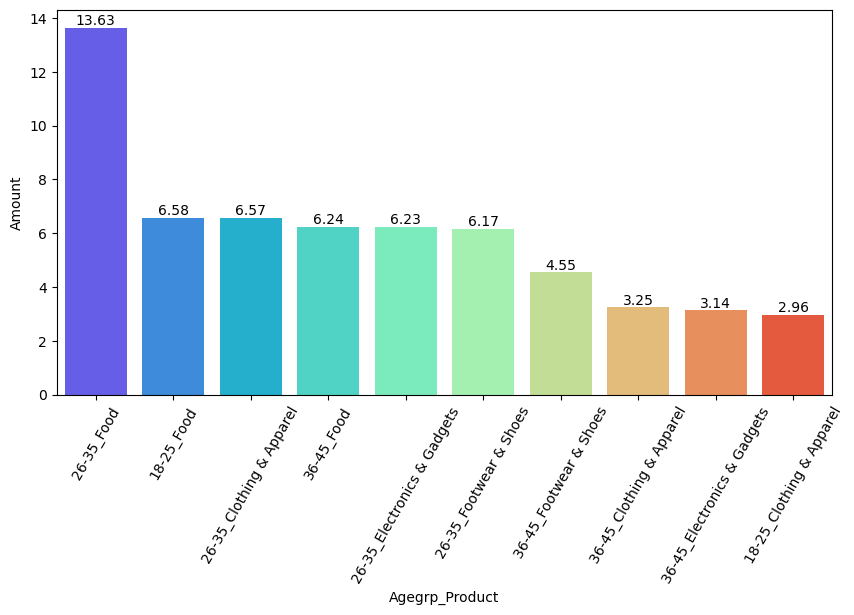

In [295]:
plt.figure(figsize=(10,5))
ap=sns.barplot(x='Agegrp_Product',y='Amount', data=age_prod_amt,  palette="rainbow")
plt.xticks(rotation=60)
for i in ap.containers:
    ap.bar_label(i)

### Observation :-
The graph shows that the 26-35 age group from the food product category contributes the highest amount in millions, highlighting their dominant spending in this category.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>12- Analysis of marital status with state on the basis of amount.</b></font>
</div>

In [297]:
df["Marital_State"]=df["Marital_Status"]+"_"+df["State"]

In [299]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat


In [301]:
marital_state_amt=df.groupby(["Marital_State"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
marital_state_amt['Amount']=round(marital_state_amt['Amount']/1000000,2)
marital_state_amt

,Marital_State,Amount
14,0_Uttar Pradesh,11.22
10,0_Maharashtra,8.54
30,1_Uttar Pradesh,8.16
7,0_Karnataka,7.81
2,0_Delhi,6.71
26,1_Maharashtra,5.89
23,1_Karnataka,5.72
18,1_Delhi,4.90
9,0_Madhya Pradesh,4.79
0,0_Andhra Pradesh,4.73


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1433401812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ms=sns.barplot(x='Marital_State',y='Amount', data=marital_state_amt,  palette="twilight")


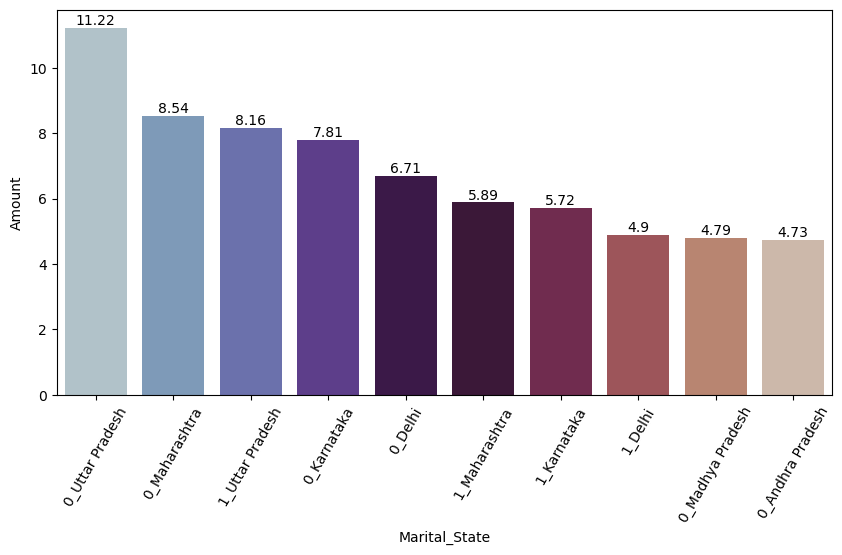

In [303]:
plt.figure(figsize=(10,5))
ms=sns.barplot(x='Marital_State',y='Amount', data=marital_state_amt,  palette="twilight")
plt.xticks(rotation=60)
for i in ms.containers:
    ms.bar_label(i)

### Observation :-
The graph shows that unmarried individuals (marital status 0) from Uttar Pradesh contribute the highest amount in millions, indicating their significant financial impact in the state.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>13- Analysis of marital status with zone on the basis of amount.</b></font>
</div>

In [309]:
df["Marital_Zone"]=df["Marital_Status"]+"_"+df["Zone"]

In [311]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western


In [313]:
marital_zone_amt=df.groupby(["Marital_Zone"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
marital_zone_amt['Amount']=round(marital_zone_amt['Amount']/1000000,2)
marital_zone_amt

,Marital_Zone,Amount
0,0_Central,24.31
5,1_Central,17.30
3,0_Southern,15.45
8,1_Southern,11.16
4,0_Western,10.98
9,1_Western,7.39
2,0_Northern,7.38
7,1_Northern,5.24
1,0_Eastern,4.01
6,1_Eastern,3.04


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\82825038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mz=sns.barplot(x='Marital_Zone',y='Amount', data=marital_zone_amt,  palette="winter_r")


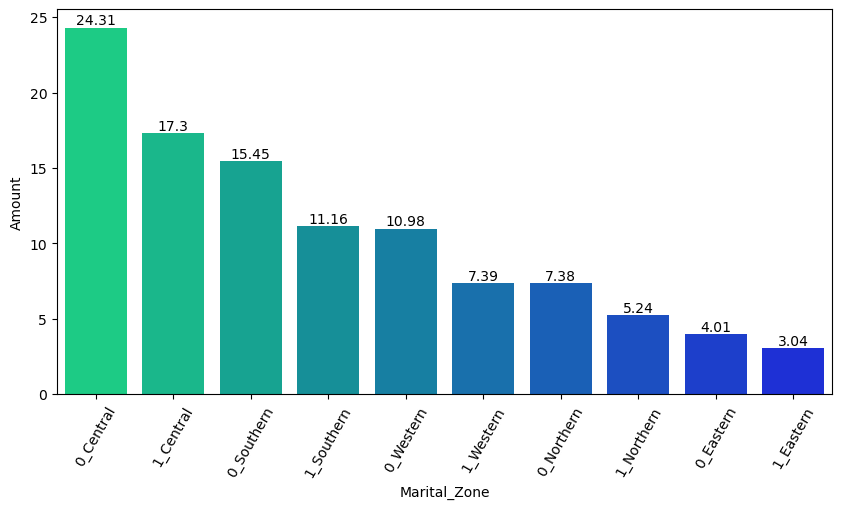

In [315]:
plt.figure(figsize=(10,5))
mz=sns.barplot(x='Marital_Zone',y='Amount', data=marital_zone_amt,  palette="winter_r")
plt.xticks(rotation=60)
for i in mz.containers:
    mz.bar_label(i)

### Observation :-
The graph shows that unmarried individuals (marital status 0) from the Central Zone contribute the highest amount in millions, making them the leading demographic in this zone.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>14- Analysis of marital status with occupation on the basis of amount.</b></font>
</div>

In [319]:
df["Marital_Occupation"]=df["Marital_Status"]+"_"+df["Occupation"]

In [321]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing


In [323]:
marital_occup_amt=df.groupby(["Marital_Occupation"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
marital_occup_amt['Amount']=round(marital_occup_amt['Amount']/1000000,2)
marital_occup_amt

,Marital_Occupation,Amount
8,0_Healthcare,9.44
10,0_IT Sector,8.20
2,0_Aviation,7.11
25,1_IT Sector,6.55
17,1_Aviation,5.49
3,0_Banking,5.39
18,1_Banking,5.38
7,0_Govt,4.92
13,0_Retail,3.70
23,1_Healthcare,3.60


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\392053226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mo=sns.barplot(x='Marital_Occupation',y='Amount', data=marital_occup_amt,  palette="vlag_r")


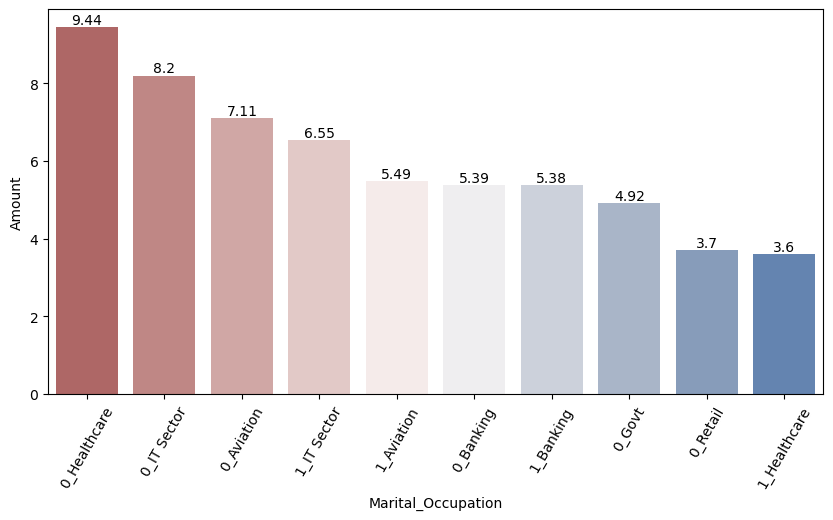

In [325]:
plt.figure(figsize=(10,5))
mo=sns.barplot(x='Marital_Occupation',y='Amount', data=marital_occup_amt,  palette="vlag_r")
plt.xticks(rotation=60)
for i in mo.containers:
    mo.bar_label(i)

### Observation :-
The graph shows that unmarried individuals (marital status 0) from the Healthcare sector contribute the highest amount in millions, indicating their prominent financial presence in this occupation.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>15- Analysis of marital status with product category on the basis of amount.</b></font>
</div>

In [329]:
df["Marital_Product"]=df["Marital_Status"]+"_"+df["Product_Category"]

In [331]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto


In [333]:
marital_prod_amt=df.groupby(["Marital_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
marital_prod_amt['Amount']=round(marital_prod_amt['Amount']/1000000,2)
marital_prod_amt

,Marital_Product,Amount
6,0_Food,20.42
24,1_Food,13.51
3,0_Clothing & Apparel,9.53
7,0_Footwear & Shoes,8.99
5,0_Electronics & Gadgets,8.84
21,1_Clothing & Apparel,6.96
23,1_Electronics & Gadgets,6.80
25,1_Footwear & Shoes,6.58
8,0_Furniture,3.16
9,0_Games & Toys,2.57


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3536012408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mp=sns.barplot(x='Marital_Product',y='Amount', data=marital_prod_amt,  palette="spring_r")


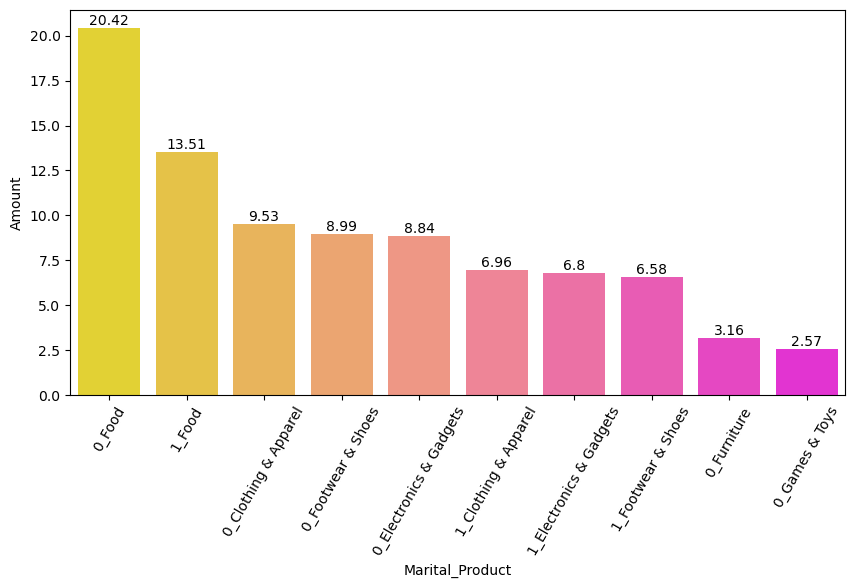

In [335]:
plt.figure(figsize=(10,5))
mp=sns.barplot(x='Marital_Product',y='Amount', data=marital_prod_amt,  palette="spring_r")
plt.xticks(rotation=60)
for i in mp.containers:
    mp.bar_label(i)

### Observation :-
The graph shows that unmarried individuals (marital status 0) in the Food Product Category contribute the highest amount in millions, highlighting their dominant spending in this category.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>16- Analysis of state with zone on the basis of amount.</b></font>
</div>

In [339]:
df["State_Zone"]=df["State"]+"_"+df["Zone"]

In [341]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western


In [343]:
state_zone_amt=df.groupby(["State_Zone"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
state_zone_amt['Amount']=round(state_zone_amt['Amount']/1000000,2)
state_zone_amt

,State_Zone,Amount
14,Uttar Pradesh_Central,19.37
10,Maharashtra_Western,14.43
7,Karnataka_Southern,13.52
2,Delhi_Central,11.60
9,Madhya Pradesh_Central,8.10
0,Andhra Pradesh_Southern,8.04
5,Himachal Pradesh_Northern,4.96
4,Haryana_Northern,4.22
1,Bihar_Eastern,4.02
3,Gujarat_Western,3.95


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3161090826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sz=sns.barplot(x='State_Zone',y='Amount', data=state_zone_amt,  palette="seismic_r")


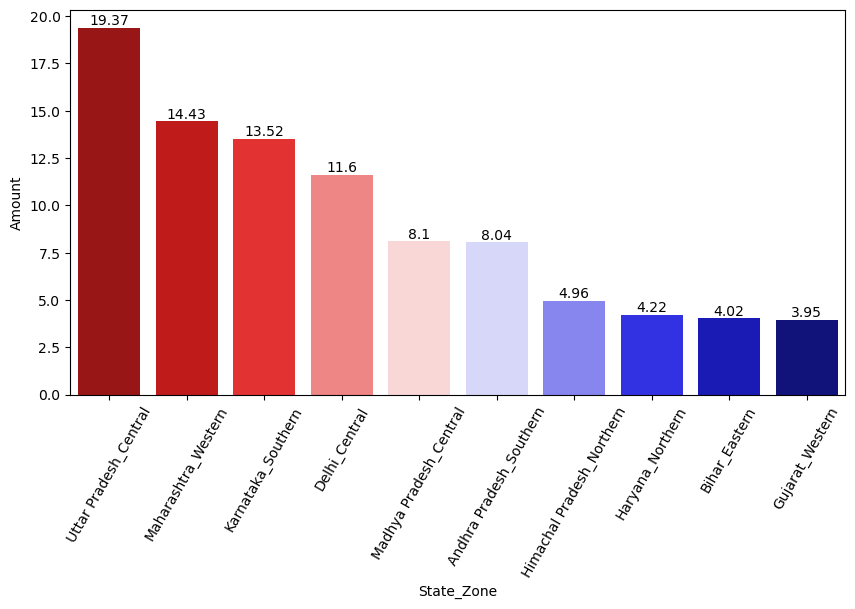

In [347]:
plt.figure(figsize=(10,5))
sz=sns.barplot(x='State_Zone',y='Amount', data=state_zone_amt,  palette="seismic_r")
plt.xticks(rotation=60)
for i in sz.containers:
    sz.bar_label(i)

### Observation :-
The graph shows that Uttar Pradesh from the Central Zone contributes the highest amount in millions, making it the leading state-zone combination.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>17- Analysis of state with occupation on the basis of amount.</b></font>
</div>

In [351]:
df["State_Occupation"]=df["State"]+"_"+df["Occupation"]

In [353]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing


In [355]:
state_occup_amt=df.groupby(["State_Occupation"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
state_occup_amt['Amount']=round(state_occup_amt['Amount']/1000000,2)
state_occup_amt

,State_Occupation,Amount
220,Uttar Pradesh_IT Sector,2.68
212,Uttar Pradesh_Aviation,2.47
218,Uttar Pradesh_Healthcare,2.43
213,Uttar Pradesh_Banking,2.02
158,Maharashtra_Healthcare,1.97
160,Maharashtra_IT Sector,1.93
115,Karnataka_IT Sector,1.90
40,Delhi_IT Sector,1.78
152,Maharashtra_Aviation,1.76
113,Karnataka_Healthcare,1.64


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1056272758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  so=sns.barplot(x='State_Occupation',y='Amount', data=state_occup_amt,  palette="prism")


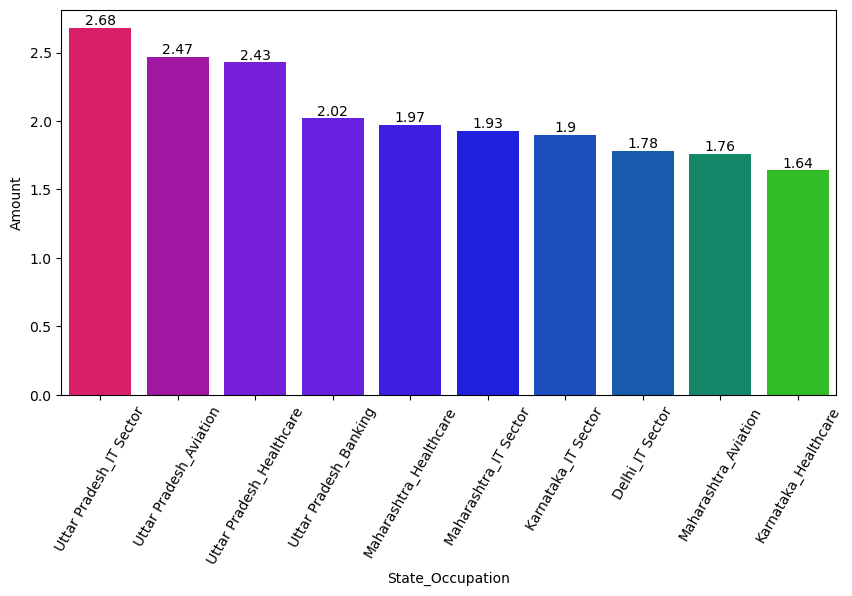

In [357]:
plt.figure(figsize=(10,5))
so=sns.barplot(x='State_Occupation',y='Amount', data=state_occup_amt,  palette="prism")
plt.xticks(rotation=60)
for i in so.containers:
    so.bar_label(i)

### Observation :-
The graph shows that Uttar Pradesh from the IT sector contributes the highest amount in millions, highlighting its significant financial impact in this occupation.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>18- Analysis of state with product category on the basis of amount.</b></font>
</div>

In [361]:
df["State_Product"]=df["State"]+"_"+df["Product_Category"]

In [363]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto


In [365]:
state_prod_amt=df.groupby(["State_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
state_prod_amt['Amount']=round(state_prod_amt['Amount']/1000000,2)
state_prod_amt

,State_Product,Amount
214,Uttar Pradesh_Food,7.98
161,Maharashtra_Food,6.42
37,Delhi_Footwear & Shoes,5.03
114,Karnataka_Footwear & Shoes,4.96
113,Karnataka_Food,4.00
211,Uttar Pradesh_Clothing & Apparel,3.10
143,Madhya Pradesh_Food,2.82
36,Delhi_Food,2.64
5,Andhra Pradesh_Food,2.16
4,Andhra Pradesh_Electronics & Gadgets,2.12


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\648787340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sp=sns.barplot(x='State_Product',y='Amount', data=state_prod_amt,  palette="nipy_spectral")


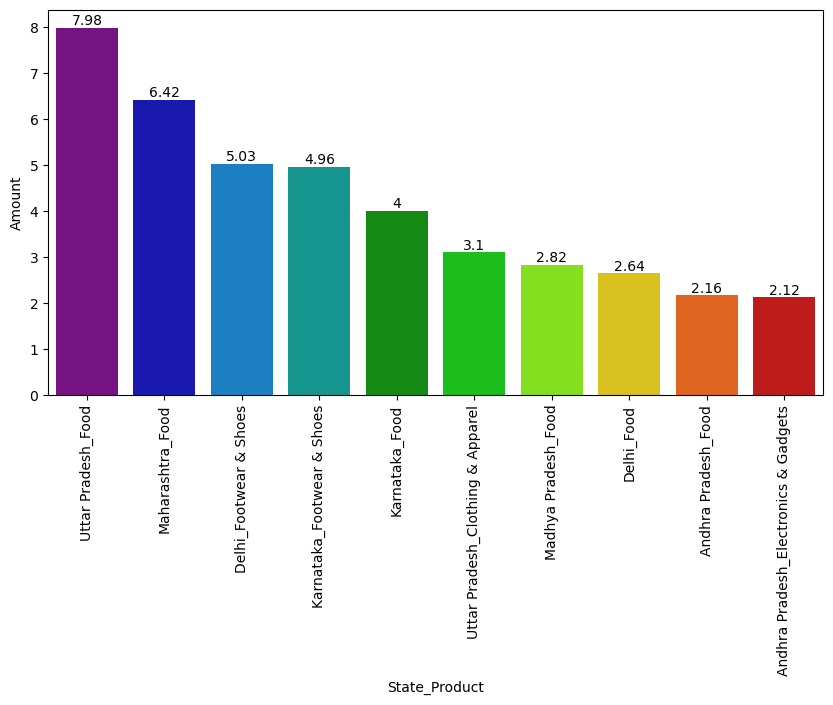

In [369]:
plt.figure(figsize=(10,5))
sp=sns.barplot(x='State_Product',y='Amount', data=state_prod_amt,  palette="nipy_spectral")
plt.xticks(rotation=90)
for i in sp.containers:
    sp.bar_label(i)

### Observation :-
The graph shows that Uttar Pradesh from the Food Product Category contributes the highest amount in millions, making it the leading state in this category.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>19- Analysis of zone with occupation on the basis of amount.</b></font>
</div>

In [373]:
df["Zone_Occupation"]=df["Zone"]+"_"+df["Occupation"]

In [375]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing


In [377]:
zone_occup_amt=df.groupby(["Zone_Occupation"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
zone_occup_amt['Amount']=round(zone_occup_amt['Amount']/1000000,2)
zone_occup_amt

,Zone_Occupation,Amount
10,Central_IT Sector,6.02
2,Central_Aviation,5.03
8,Central_Healthcare,4.83
3,Central_Banking,4.04
55,Southern_IT Sector,3.64
7,Central_Govt,3.50
53,Southern_Healthcare,3.41
47,Southern_Aviation,3.12
48,Southern_Banking,2.82
9,Central_Hospitality,2.48


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3993501168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  zo=sns.barplot(x='Zone_Occupation',y='Amount', data=zone_occup_amt,  palette="mako_r")


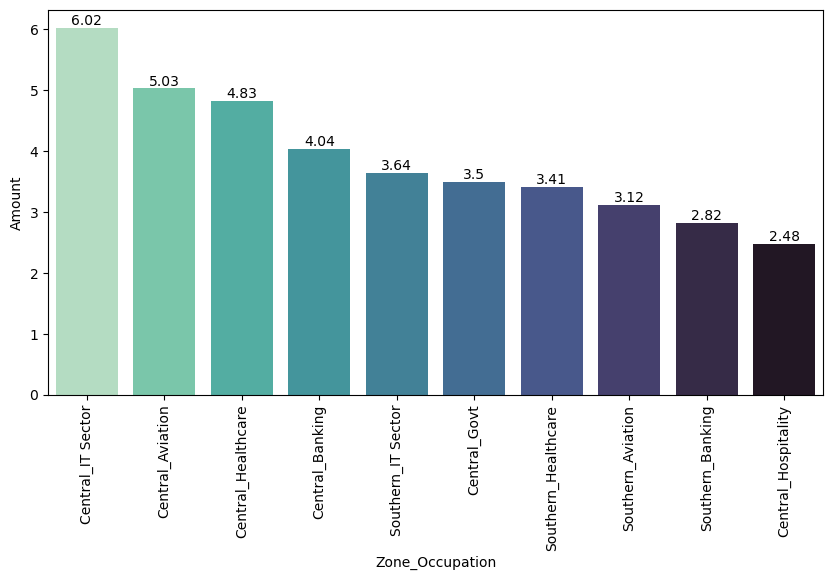

In [379]:
plt.figure(figsize=(10,5))
zo=sns.barplot(x='Zone_Occupation',y='Amount', data=zone_occup_amt,  palette="mako_r")
plt.xticks(rotation=90)
for i in zo.containers:
    zo.bar_label(i)

### Observation :-
The graph shows that the Central Zone from the IT sector contributes the highest amount in millions, indicating its dominant financial presence in this occupation.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>20- Analysis of zone with product category on the basis of amount.</b></font>
</div>

In [383]:
df["Zone_Product"]=df["Zone"]+"_"+df["Product_Category"]

In [385]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto


In [387]:
zone_prod_amt=df.groupby(["Zone_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
zone_prod_amt['Amount']=round(zone_prod_amt['Amount']/1000000,2)
zone_prod_amt

,Zone_Product,Amount
6,Central_Food,13.69
7,Central_Footwear & Shoes,8.47
74,Western_Food,7.76
56,Southern_Food,7.33
3,Central_Clothing & Apparel,5.74
57,Southern_Footwear & Shoes,5.44
38,Northern_Electronics & Gadgets,3.99
5,Central_Electronics & Gadgets,3.91
55,Southern_Electronics & Gadgets,3.88
54,Southern_Clothing & Apparel,3.65


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1411518195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  zp=sns.barplot(x='Zone_Product',y='Amount', data=zone_prod_amt,  palette="nipy_spectral_r")


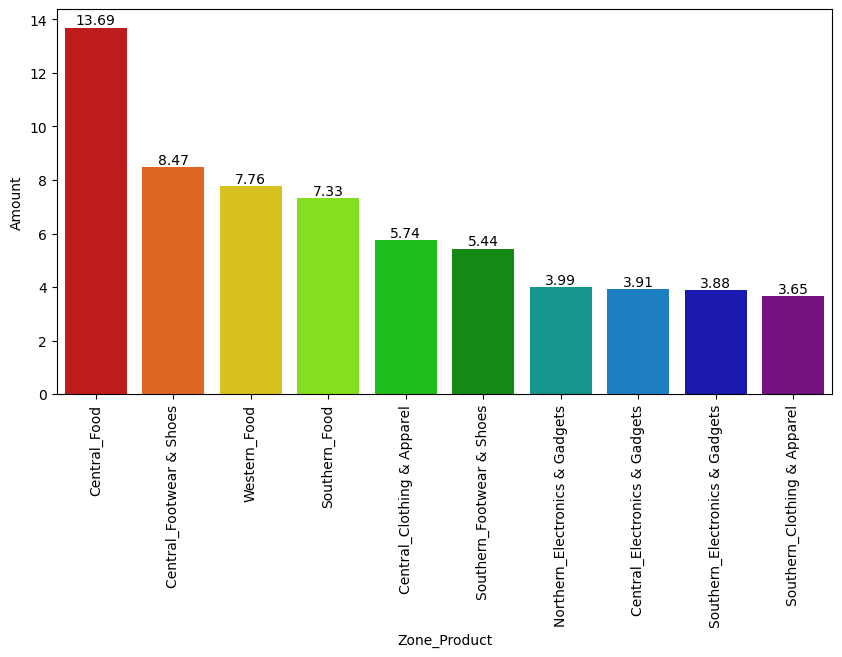

In [389]:
plt.figure(figsize=(10,5))
zp=sns.barplot(x='Zone_Product',y='Amount', data=zone_prod_amt,  palette="nipy_spectral_r")
plt.xticks(rotation=90)
for i in zp.containers:
    zp.bar_label(i)

### Observation :-
The graph shows that the Central Zone from the Food Product Category contributes the highest amount in millions, making it the leading zone in this category.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>21- Analysis of occupation with product category on the basis of amount.</b></font>
</div>

In [393]:
df["Occupation_Product"]=df["Occupation"]+"_"+df["Product_Category"]

In [395]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto


In [397]:
occup_prod_amt=df.groupby(["Occupation_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
occup_prod_amt['Amount']=round(occup_prod_amt['Amount']/1000000,2)
occup_prod_amt

,Occupation_Product,Amount
182,IT Sector_Food,4.66
146,Healthcare_Food,4.47
41,Aviation_Food,4.31
128,Govt_Food,3.24
59,Banking_Food,2.89
217,Media_Food,2.35
183,IT Sector_Footwear & Shoes,2.28
143,Healthcare_Clothing & Apparel,2.25
179,IT Sector_Clothing & Apparel,2.23
181,IT Sector_Electronics & Gadgets,2.22


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\4177059446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  op=sns.barplot(x='Occupation_Product',y='Amount', data=occup_prod_amt,  palette="ocean")


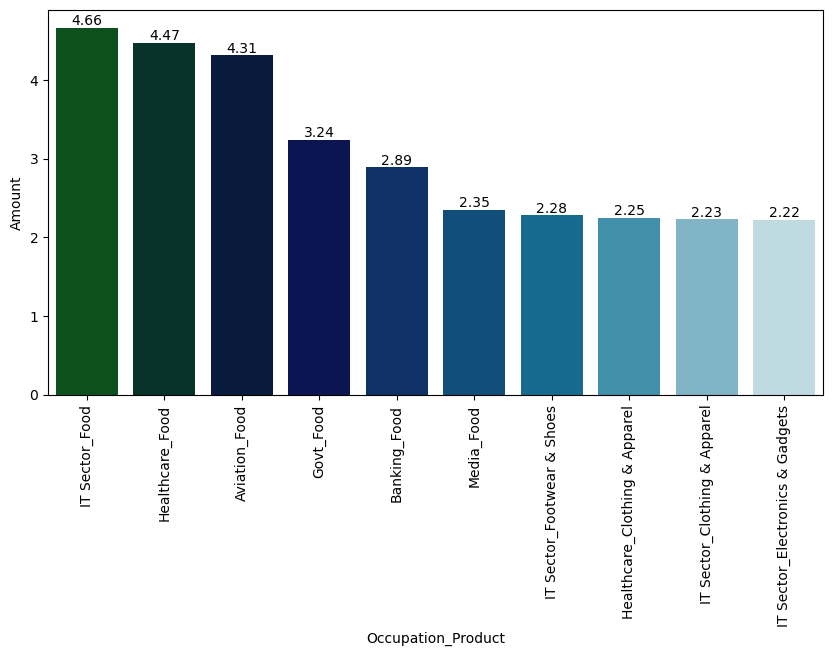

In [399]:
plt.figure(figsize=(10,5))
op=sns.barplot(x='Occupation_Product',y='Amount', data=occup_prod_amt,  palette="ocean")
plt.xticks(rotation=90)
for i in op.containers:
    op.bar_label(i)

### Observation :-
The graph shows that the IT sector contributes the highest amount in millions within the Food Product Category, highlighting a significant financial presence in this sector.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>22- Analysis of Gender,Age and marital status on the basis of amount.</b></font>
</div>

In [424]:
df["Gen_Age_Marital"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]

In [426]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1


In [428]:
gen_age_marital_amt=df.groupby(["Gen_Age_Marital"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_marital_amt['Amount']=round(gen_age_marital_amt['Amount']/1000000,2)
gen_age_marital_amt

,Gen_Age_Marital,Amount
4,F_26-35_0,18.22
5,F_26-35_1,12.74
6,F_36-45_0,9.11
2,F_18-25_0,6.85
18,M_26-35_0,6.79
7,F_36-45_1,6.40
3,F_18-25_1,5.04
19,M_26-35_1,4.86
8,F_46-50_0,3.89
20,M_36-45_0,3.76


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1737631944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gam=sns.barplot(x='Gen_Age_Marital',y='Amount', data=gen_age_marital_amt,  palette="pink")


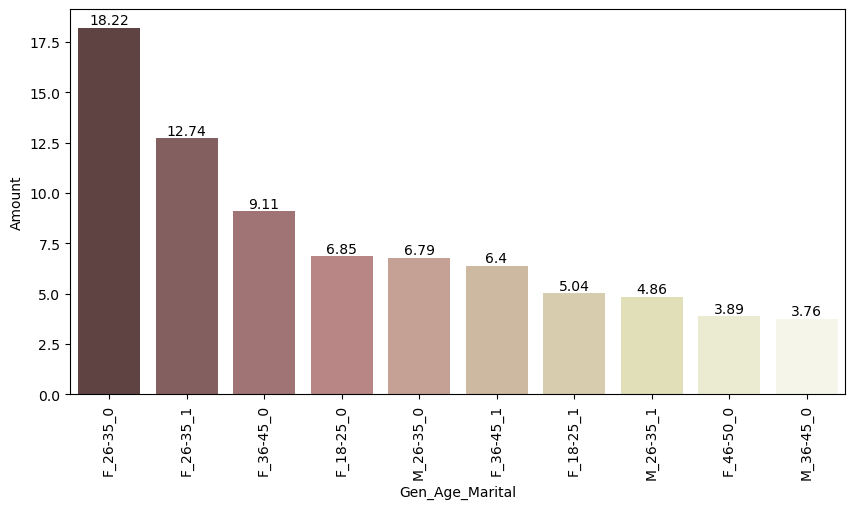

In [432]:
plt.figure(figsize=(10,5))
gam=sns.barplot(x='Gen_Age_Marital',y='Amount', data=gen_age_marital_amt,  palette="pink")
plt.xticks(rotation=90)
for i in gam.containers:
    gam.bar_label(i)

### Observation :-
The graph reveals that the highest amount in millions for females, particularly in the 26-35 age group, is associated with the unmarried category (0).

<div class = "alert alert-block alert-info">
<font color = 'black'><b>23- Analysis of Gender,Age,Marital status and State on the basis of amount.</b></font>
</div>

In [434]:
df["Gen_Age_Marital_State"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["State"]

In [436]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat


In [438]:
gen_age_marital_s_amt=df.groupby(["Gen_Age_Marital_State"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_marital_s_amt['Amount']=round(gen_age_marital_s_amt['Amount']/1000000,2)
gen_age_marital_s_amt

,Gen_Age_Marital_State,Amount
77,F_26-35_0_Uttar Pradesh,3.25
73,F_26-35_0_Maharashtra,2.79
70,F_26-35_0_Karnataka,2.59
93,F_26-35_1_Uttar Pradesh,2.47
65,F_26-35_0_Delhi,2.02
86,F_26-35_1_Karnataka,1.77
89,F_26-35_1_Maharashtra,1.72
109,F_36-45_0_Uttar Pradesh,1.72
81,F_26-35_1_Delhi,1.62
102,F_36-45_0_Karnataka,1.49


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\4029105152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gams=sns.barplot(x='Gen_Age_Marital_State',y='Amount', data=gen_age_marital_s_amt,  palette="prism")


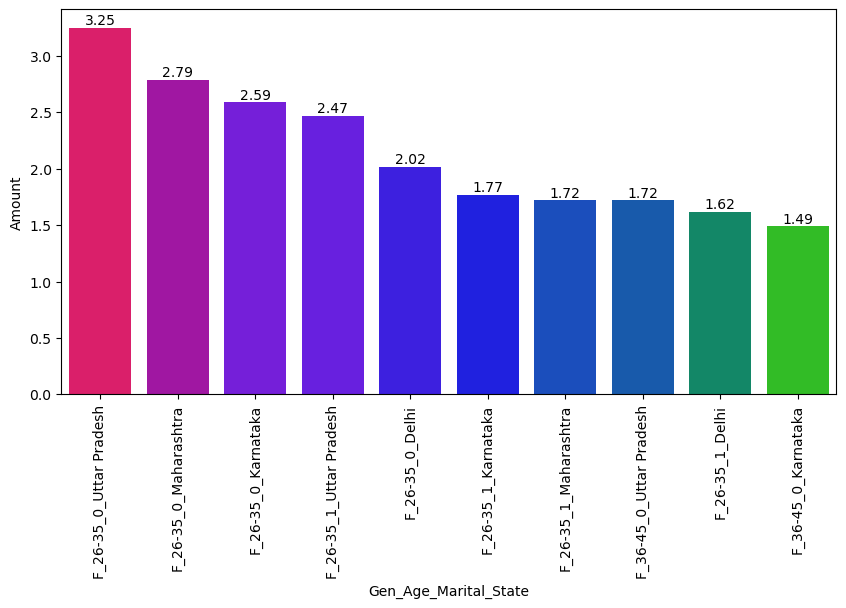

In [440]:
plt.figure(figsize=(10,5))
gams=sns.barplot(x='Gen_Age_Marital_State',y='Amount', data=gen_age_marital_s_amt,  palette="prism")
plt.xticks(rotation=90)
for i in gams.containers:
    gams.bar_label(i)

### Observation :-
The graph indicates that the highest amount in millions for females in the 26-35 age group from Uttar Pradesh is associated with the unmarried category (0).

<div class = "alert alert-block alert-info">
<font color = 'black'><b>24- Analysis of Gender,Age,Marital status and zone on the basis of amount.</b></font>
</div>

In [442]:
df["Gen_Age_Marital_Zone"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["Zone"]

In [444]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State,Gen_Age_Marital_Zone
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra,F_26-35_0_Western
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh,F_26-35_1_Southern
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh,F_26-35_1_Central
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka,M_0-17_0_Southern
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat,M_26-35_1_Western


In [446]:
gen_age_marital_z_amt=df.groupby(["Gen_Age_Marital_Zone"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_marital_z_amt['Amount']=round(gen_age_marital_z_amt['Amount']/1000000,2)
gen_age_marital_z_amt

,Gen_Age_Marital_Zone,Amount
20,F_26-35_0_Central,6.73
25,F_26-35_1_Central,5.06
23,F_26-35_0_Southern,4.83
30,F_36-45_0_Central,3.94
24,F_26-35_0_Western,3.48
28,F_26-35_1_Southern,3.19
90,M_26-35_0_Central,2.68
10,F_18-25_0_Central,2.52
33,F_36-45_0_Southern,2.49
35,F_36-45_1_Central,2.47


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1001053637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gamz=sns.barplot(x='Gen_Age_Marital_Zone',y='Amount', data=gen_age_marital_z_amt,  palette="terrain")


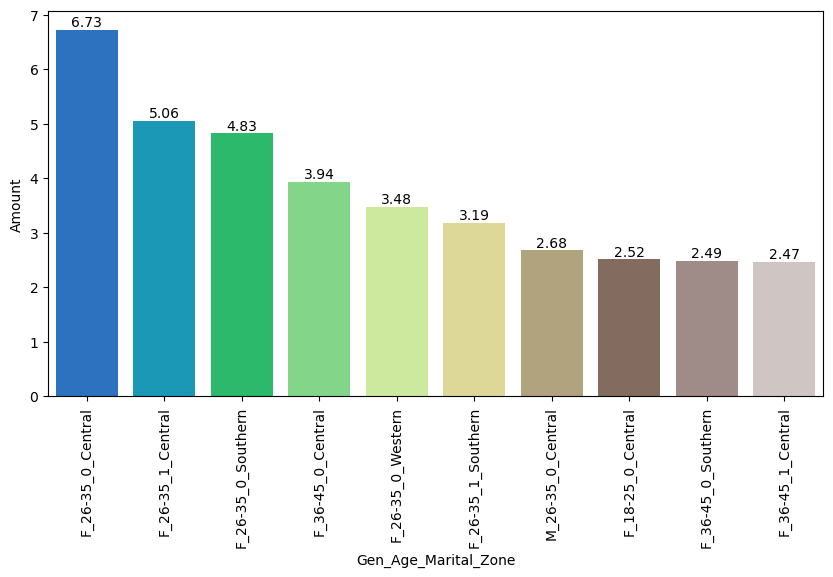

In [448]:
plt.figure(figsize=(10,5))
gamz=sns.barplot(x='Gen_Age_Marital_Zone',y='Amount', data=gen_age_marital_z_amt,  palette="terrain")
plt.xticks(rotation=90)
for i in gamz.containers:
    gamz.bar_label(i)

### Observation :-
The graph shows that the highest amount in millions for females in the 26-35 age group from the Central zone is associated with the unmarried category (0).

<div class = "alert alert-block alert-info">
<font color = 'black'><b>25- Analysis of Gender,Age,Marital status and Occupation on the basis of amount.</b></font>
</div>

In [450]:
df["Gen_Age_Marital_Occupation"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["Occupation"]

In [452]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State,Gen_Age_Marital_Zone,Gen_Age_Marital_Occupation
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra,F_26-35_0_Western,F_26-35_0_Healthcare
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh,F_26-35_1_Southern,F_26-35_1_Govt
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh,F_26-35_1_Central,F_26-35_1_Automobile
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka,M_0-17_0_Southern,M_0-17_0_Construction
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat,M_26-35_1_Western,M_26-35_1_Food Processing


In [454]:
gen_age_marital_o_amt=df.groupby(["Gen_Age_Marital_Occupation"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_marital_o_amt['Amount']=round(gen_age_marital_o_amt['Amount']/1000000,2)
gen_age_marital_o_amt

,Gen_Age_Marital_Occupation,Amount
65,F_26-35_0_Healthcare,2.80
67,F_26-35_0_IT Sector,2.41
59,F_26-35_0_Aviation,2.20
82,F_26-35_1_IT Sector,1.98
75,F_26-35_1_Banking,1.78
60,F_26-35_0_Banking,1.74
74,F_26-35_1_Aviation,1.66
70,F_26-35_0_Retail,1.34
95,F_36-45_0_Healthcare,1.29
64,F_26-35_0_Govt,1.24


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1159515027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gamo=sns.barplot(x='Gen_Age_Marital_Occupation',y='Amount', data=gen_age_marital_o_amt,  palette="ocean_r")


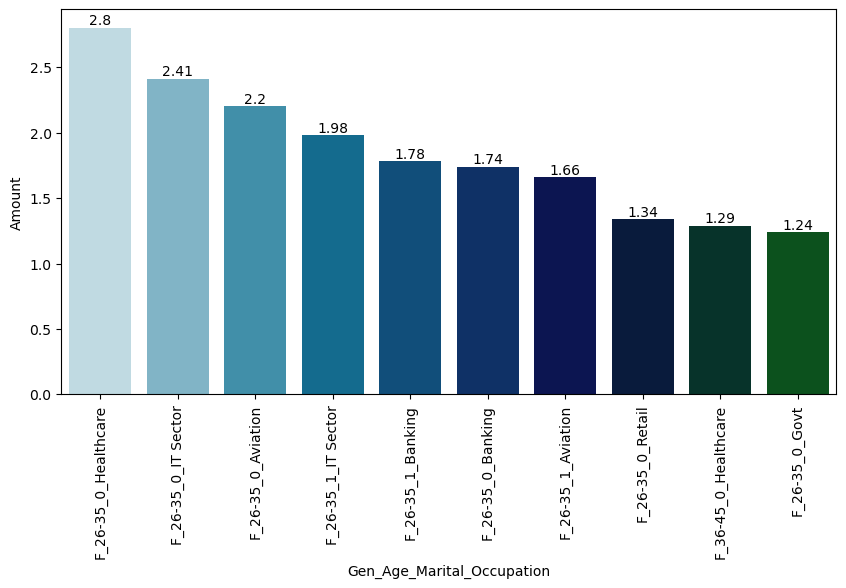

In [456]:
plt.figure(figsize=(10,5))
gamo=sns.barplot(x='Gen_Age_Marital_Occupation',y='Amount', data=gen_age_marital_o_amt,  palette="ocean_r")
plt.xticks(rotation=90)
for i in gamo.containers:
    gamo.bar_label(i)

### Observation :-
The graph highlights that the highest amount in millions for females in the 26-35 age group, in the Healthcare occupation, is linked to the unmarried category (0).

<div class = "alert alert-block alert-info">
<font color = 'black'><b>26- Analysis of Gender,Age,Marital status and Product category on the basis of amount.</b></font>
</div>

In [458]:
df["Gen_Age_Marital_Product"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["Product_Category"]

In [460]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State,Gen_Age_Marital_Zone,Gen_Age_Marital_Occupation,Gen_Age_Marital_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra,F_26-35_0_Western,F_26-35_0_Healthcare,F_26-35_0_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh,F_26-35_1_Southern,F_26-35_1_Govt,F_26-35_1_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh,F_26-35_1_Central,F_26-35_1_Automobile,F_26-35_1_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka,M_0-17_0_Southern,M_0-17_0_Construction,M_0-17_0_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat,M_26-35_1_Western,M_26-35_1_Food Processing,M_26-35_1_Auto


In [462]:
gen_age_marital_p_amt=df.groupby(["Gen_Age_Marital_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_marital_p_amt['Amount']=round(gen_age_marital_p_amt['Amount']/1000000,2)
gen_age_marital_p_amt

,Gen_Age_Marital_Product,Amount
63,F_26-35_0_Food,6.21
81,F_26-35_1_Food,3.80
64,F_26-35_0_Footwear & Shoes,2.89
28,F_18-25_0_Food,2.78
60,F_26-35_0_Clothing & Apparel,2.69
99,F_36-45_0_Food,2.60
62,F_26-35_0_Electronics & Gadgets,2.52
82,F_26-35_1_Footwear & Shoes,2.32
284,M_26-35_0_Food,2.16
100,F_36-45_0_Footwear & Shoes,2.12


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\2658036616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gamp=sns.barplot(x='Gen_Age_Marital_Product',y='Amount', data=gen_age_marital_p_amt,  palette="ocean")


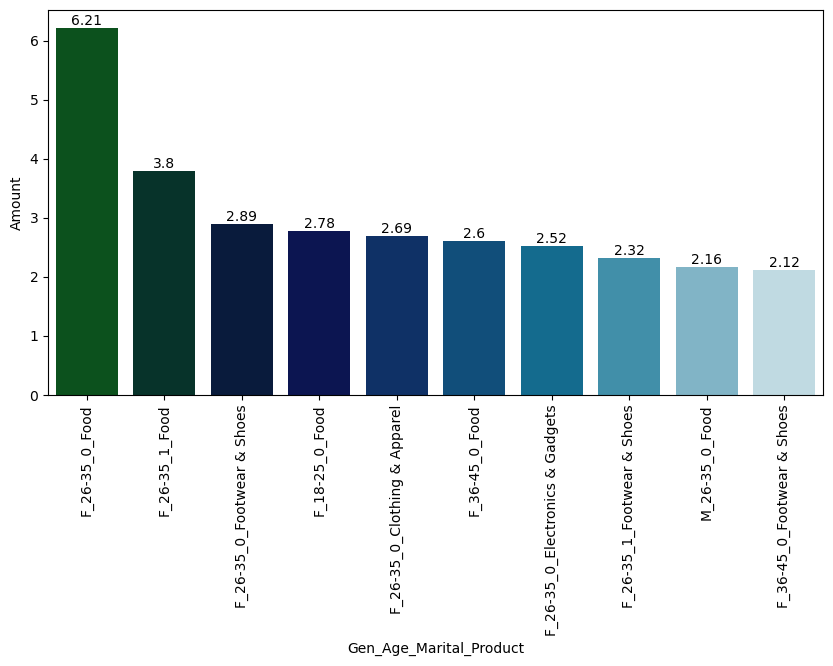

In [464]:
plt.figure(figsize=(10,5))
gamp=sns.barplot(x='Gen_Age_Marital_Product',y='Amount', data=gen_age_marital_p_amt,  palette="ocean")
plt.xticks(rotation=90)
for i in gamp.containers:
    gamp.bar_label(i)

### Observation :-
The graph reveals that the highest amount in millions for females in the 26-35 age group, in the food product category, is associated with the unmarried category (0).

<div class = "alert alert-block alert-info">
<font color = 'black'><b>27- Analysis of Gender,Age,Marital status,State and Zone on the basis of amount.</b></font>
</div>

In [466]:
df["Gen_Age_Marital_State_Zone"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["State"]+"_"+df["Zone"]

In [468]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State,Gen_Age_Marital_Zone,Gen_Age_Marital_Occupation,Gen_Age_Marital_Product,Gen_Age_Marital_State_Zone
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra,F_26-35_0_Western,F_26-35_0_Healthcare,F_26-35_0_Auto,F_26-35_0_Maharashtra_Western
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh,F_26-35_1_Southern,F_26-35_1_Govt,F_26-35_1_Auto,F_26-35_1_Andhra Pradesh_Southern
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh,F_26-35_1_Central,F_26-35_1_Automobile,F_26-35_1_Auto,F_26-35_1_Uttar Pradesh_Central
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka,M_0-17_0_Southern,M_0-17_0_Construction,M_0-17_0_Auto,M_0-17_0_Karnataka_Southern
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat,M_26-35_1_Western,M_26-35_1_Food Processing,M_26-35_1_Auto,M_26-35_1_Gujarat_Western


In [470]:
gen_age_m_s_z_amt=df.groupby(["Gen_Age_Marital_State_Zone"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_m_s_z_amt['Amount']=round(gen_age_m_s_z_amt['Amount']/1000000,2)
gen_age_m_s_z_amt

,Gen_Age_Marital_State_Zone,Amount
77,F_26-35_0_Uttar Pradesh_Central,3.25
73,F_26-35_0_Maharashtra_Western,2.79
70,F_26-35_0_Karnataka_Southern,2.59
93,F_26-35_1_Uttar Pradesh_Central,2.47
65,F_26-35_0_Delhi_Central,2.02
86,F_26-35_1_Karnataka_Southern,1.77
89,F_26-35_1_Maharashtra_Western,1.72
109,F_36-45_0_Uttar Pradesh_Central,1.72
81,F_26-35_1_Delhi_Central,1.62
102,F_36-45_0_Karnataka_Southern,1.49


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1886860901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  z=sns.barplot(x='Gen_Age_Marital_State_Zone',y='Amount', data=gen_age_m_s_z_amt,  palette="magma")


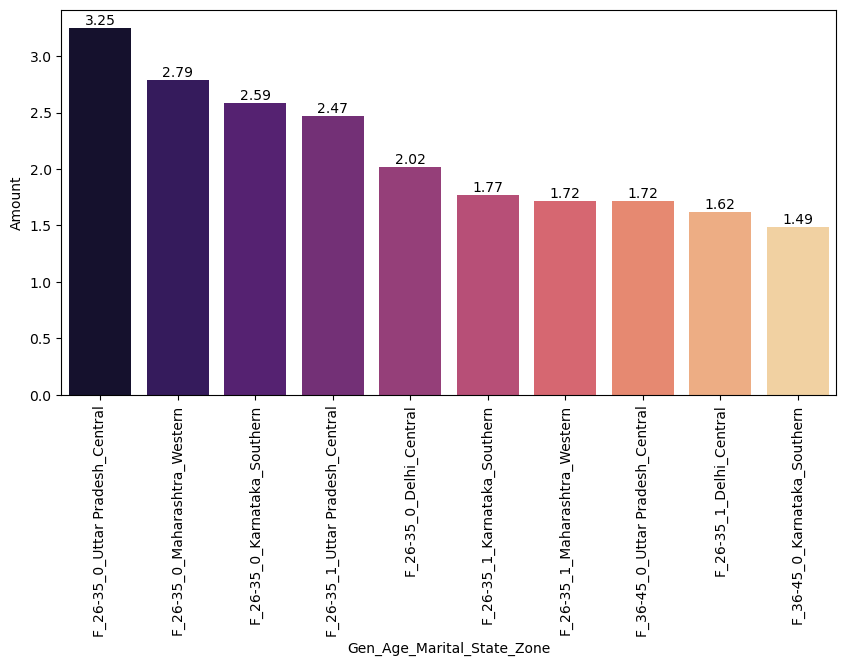

In [472]:
plt.figure(figsize=(10,5))
z=sns.barplot(x='Gen_Age_Marital_State_Zone',y='Amount', data=gen_age_m_s_z_amt,  palette="magma")
plt.xticks(rotation=90)
for i in z.containers:
    z.bar_label(i)

### Observation :-
The graph shows that the highest amount in millions for females in the 26-35 age group, unmarried (0), is from Uttar Pradesh in the Central zone.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>28- Analysis of Gender,Age,Marital status,State and Occupation on the basis of amount.</b></font>
</div>

In [474]:
df["Gen_Age_Marital_State_Occupation"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["State"]+"_"+df["Occupation"]

In [476]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State,Gen_Age_Marital_Zone,Gen_Age_Marital_Occupation,Gen_Age_Marital_Product,Gen_Age_Marital_State_Zone,Gen_Age_Marital_State_Occupation
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra,F_26-35_0_Western,F_26-35_0_Healthcare,F_26-35_0_Auto,F_26-35_0_Maharashtra_Western,F_26-35_0_Maharashtra_Healthcare
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh,F_26-35_1_Southern,F_26-35_1_Govt,F_26-35_1_Auto,F_26-35_1_Andhra Pradesh_Southern,F_26-35_1_Andhra Pradesh_Govt
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh,F_26-35_1_Central,F_26-35_1_Automobile,F_26-35_1_Auto,F_26-35_1_Uttar Pradesh_Central,F_26-35_1_Uttar Pradesh_Automobile
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka,M_0-17_0_Southern,M_0-17_0_Construction,M_0-17_0_Auto,M_0-17_0_Karnataka_Southern,M_0-17_0_Karnataka_Construction
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat,M_26-35_1_Western,M_26-35_1_Food Processing,M_26-35_1_Auto,M_26-35_1_Gujarat_Western,M_26-35_1_Gujarat_Food Processing


In [478]:
gen_age_m_s_o_amt=df.groupby(["Gen_Age_Marital_State_Occupation"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_m_s_o_amt['Amount']=round(gen_age_m_s_o_amt['Amount']/1000000,2)
gen_age_m_s_o_amt

,Gen_Age_Marital_State_Occupation,Amount
691,F_26-35_0_Uttar Pradesh_Healthcare,0.55
646,F_26-35_0_Maharashtra_Healthcare,0.49
685,F_26-35_0_Uttar Pradesh_Aviation,0.42
896,F_26-35_1_Uttar Pradesh_Aviation,0.42
640,F_26-35_0_Maharashtra_Aviation,0.39
904,F_26-35_1_Uttar Pradesh_IT Sector,0.38
693,F_26-35_0_Uttar Pradesh_IT Sector,0.37
897,F_26-35_1_Uttar Pradesh_Banking,0.35
604,F_26-35_0_Karnataka_IT Sector,0.35
1099,F_36-45_0_Uttar Pradesh_Healthcare,0.33


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\4279437069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  i=sns.barplot(x='Gen_Age_Marital_State_Occupation',y='Amount', data=gen_age_m_s_o_amt,  palette="icefire")


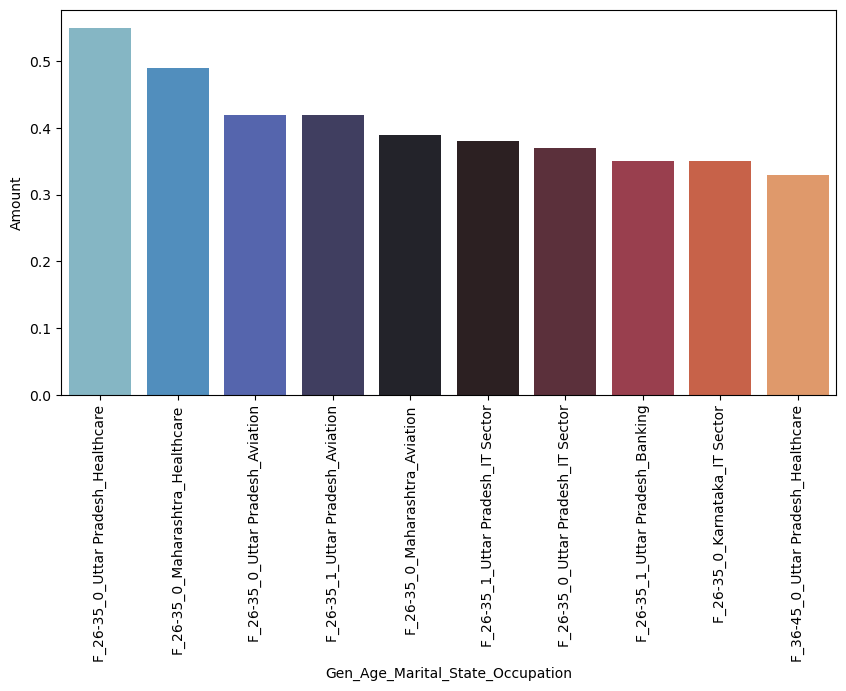

In [490]:
plt.figure(figsize=(10,5))
i=sns.barplot(x='Gen_Age_Marital_State_Occupation',y='Amount', data=gen_age_m_s_o_amt,  palette="icefire")
plt.xticks(rotation=90)
plt.show()

### Observation :-
The graph indicates that the highest amount in millions for females in the 26-35 age group, unmarried (0), is from Uttar Pradesh in the Healthcare occupation.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>29- Analysis of Gender,Age,Marital status,State and Product category on the basis of amount.</b></font>
</div>

In [484]:
df["Gen_Age_Marital_State_Product"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["State"]+"_"+df["Product_Category"]

In [486]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State,Gen_Age_Marital_Zone,Gen_Age_Marital_Occupation,Gen_Age_Marital_Product,Gen_Age_Marital_State_Zone,Gen_Age_Marital_State_Occupation,Gen_Age_Marital_State_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra,F_26-35_0_Western,F_26-35_0_Healthcare,F_26-35_0_Auto,F_26-35_0_Maharashtra_Western,F_26-35_0_Maharashtra_Healthcare,F_26-35_0_Maharashtra_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh,F_26-35_1_Southern,F_26-35_1_Govt,F_26-35_1_Auto,F_26-35_1_Andhra Pradesh_Southern,F_26-35_1_Andhra Pradesh_Govt,F_26-35_1_Andhra Pradesh_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh,F_26-35_1_Central,F_26-35_1_Automobile,F_26-35_1_Auto,F_26-35_1_Uttar Pradesh_Central,F_26-35_1_Uttar Pradesh_Automobile,F_26-35_1_Uttar Pradesh_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka,M_0-17_0_Southern,M_0-17_0_Construction,M_0-17_0_Auto,M_0-17_0_Karnataka_Southern,M_0-17_0_Karnataka_Construction,M_0-17_0_Karnataka_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat,M_26-35_1_Western,M_26-35_1_Food Processing,M_26-35_1_Auto,M_26-35_1_Gujarat_Western,M_26-35_1_Gujarat_Food Processing,M_26-35_1_Gujarat_Auto


In [488]:
gen_age_m_s_p_amt=df.groupby(["Gen_Age_Marital_State_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_m_s_p_amt['Amount']=round(gen_age_m_s_p_amt['Amount']/1000000,2)
gen_age_m_s_p_amt

,Gen_Age_Marital_State_Product,Amount
412,F_26-35_0_Uttar Pradesh_Food,1.56
388,F_26-35_0_Maharashtra_Food,1.33
361,F_26-35_0_Karnataka_Footwear & Shoes,1.27
534,F_26-35_1_Uttar Pradesh_Food,1.10
325,F_26-35_0_Delhi_Footwear & Shoes,1.05
446,F_26-35_1_Delhi_Footwear & Shoes,1.00
482,F_26-35_1_Karnataka_Footwear & Shoes,0.89
566,F_36-45_0_Delhi_Footwear & Shoes,0.88
509,F_26-35_1_Maharashtra_Food,0.77
360,F_26-35_0_Karnataka_Food,0.76


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\1816482867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b=sns.barplot(x='Gen_Age_Marital_State_Product',y='Amount', data=gen_age_m_s_p_amt,  palette="gist_heat")


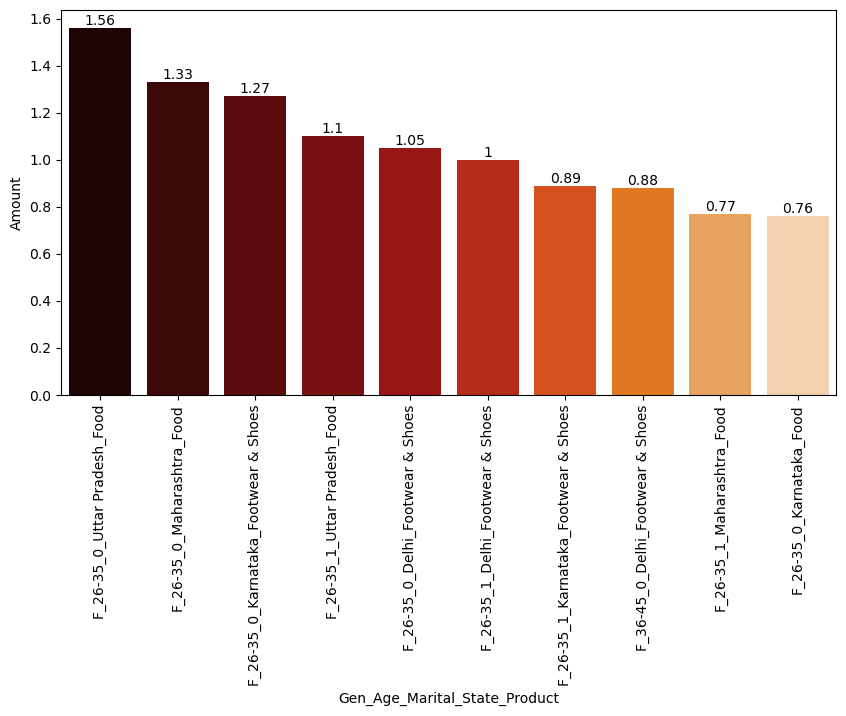

In [492]:
plt.figure(figsize=(10,5))
b=sns.barplot(x='Gen_Age_Marital_State_Product',y='Amount', data=gen_age_m_s_p_amt,  palette="gist_heat")
plt.xticks(rotation=90)
for i in b.containers:
    b.bar_label(i)

### Observation :-
The graph indicates that the highest amount in millions for females in the 26-35 age group, unmarried (0), is from Uttar Pradesh in the Food Product Category.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>30- Analysis of Gender,Age,Marital status,State,Zone and Occupation on the basis of amount.</b></font>
</div>

In [494]:
df["Gen_Age_Marital_State_Zone_Occup"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["State"]+"_"+df["Zone"]+"_"+df["Occupation"]

In [496]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State,Gen_Age_Marital_Zone,Gen_Age_Marital_Occupation,Gen_Age_Marital_Product,Gen_Age_Marital_State_Zone,Gen_Age_Marital_State_Occupation,Gen_Age_Marital_State_Product,Gen_Age_Marital_State_Zone_Occup
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra,F_26-35_0_Western,F_26-35_0_Healthcare,F_26-35_0_Auto,F_26-35_0_Maharashtra_Western,F_26-35_0_Maharashtra_Healthcare,F_26-35_0_Maharashtra_Auto,F_26-35_0_Maharashtra_Western_Healthcare
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh,F_26-35_1_Southern,F_26-35_1_Govt,F_26-35_1_Auto,F_26-35_1_Andhra Pradesh_Southern,F_26-35_1_Andhra Pradesh_Govt,F_26-35_1_Andhra Pradesh_Auto,F_26-35_1_Andhra Pradesh_Southern_Govt
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh,F_26-35_1_Central,F_26-35_1_Automobile,F_26-35_1_Auto,F_26-35_1_Uttar Pradesh_Central,F_26-35_1_Uttar Pradesh_Automobile,F_26-35_1_Uttar Pradesh_Auto,F_26-35_1_Uttar Pradesh_Central_Automobile
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka,M_0-17_0_Southern,M_0-17_0_Construction,M_0-17_0_Auto,M_0-17_0_Karnataka_Southern,M_0-17_0_Karnataka_Construction,M_0-17_0_Karnataka_Auto,M_0-17_0_Karnataka_Southern_Construction
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat,M_26-35_1_Western,M_26-35_1_Food Processing,M_26-35_1_Auto,M_26-35_1_Gujarat_Western,M_26-35_1_Gujarat_Food Processing,M_26-35_1_Gujarat_Auto,M_26-35_1_Gujarat_Western_Food Processing


In [498]:
gen_age_m_s_z_o_amt=df.groupby(["Gen_Age_Marital_State_Zone_Occup"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_m_s_z_o_amt['Amount']=round(gen_age_m_s_z_o_amt['Amount']/1000000,2)
gen_age_m_s_z_o_amt

,Gen_Age_Marital_State_Zone_Occup,Amount
691,F_26-35_0_Uttar Pradesh_Central_Healthcare,0.55
646,F_26-35_0_Maharashtra_Western_Healthcare,0.49
685,F_26-35_0_Uttar Pradesh_Central_Aviation,0.42
896,F_26-35_1_Uttar Pradesh_Central_Aviation,0.42
640,F_26-35_0_Maharashtra_Western_Aviation,0.39
904,F_26-35_1_Uttar Pradesh_Central_IT Sector,0.38
693,F_26-35_0_Uttar Pradesh_Central_IT Sector,0.37
897,F_26-35_1_Uttar Pradesh_Central_Banking,0.35
604,F_26-35_0_Karnataka_Southern_IT Sector,0.35
1099,F_36-45_0_Uttar Pradesh_Central_Healthcare,0.33


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\4035467384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  r=sns.barplot(x='Gen_Age_Marital_State_Zone_Occup',y='Amount', data=gen_age_m_s_z_o_amt,  palette="gnuplot2")


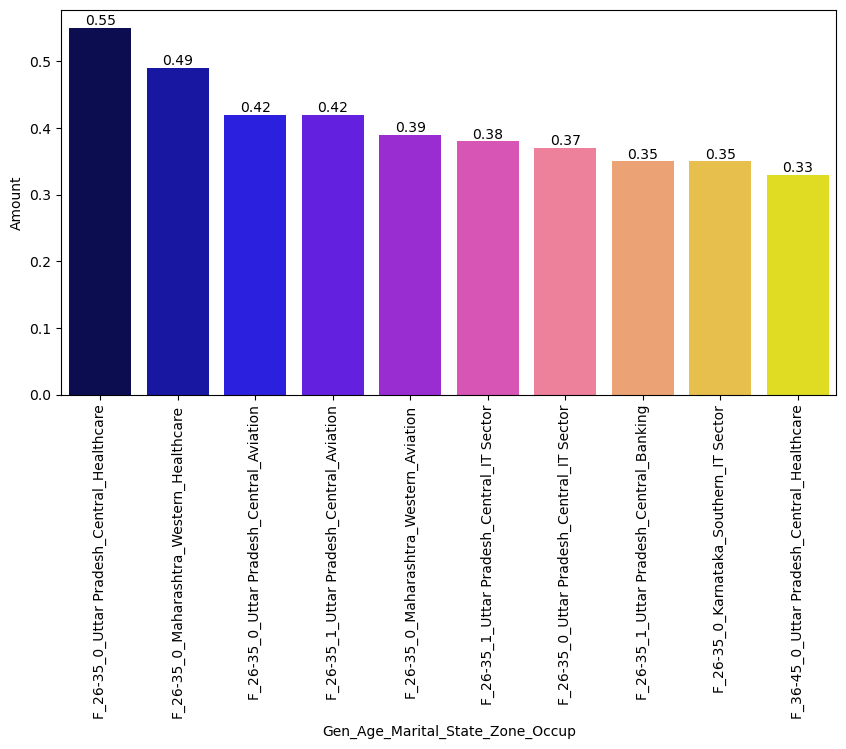

In [500]:
plt.figure(figsize=(10,5))
r=sns.barplot(x='Gen_Age_Marital_State_Zone_Occup',y='Amount', data=gen_age_m_s_z_o_amt,  palette="gnuplot2")
plt.xticks(rotation=90)
for i in r.containers:
    r.bar_label(i)

### Observation :-
The graph shows that the highest amount in millions for females in the 26-35 age group, unmarried (0), is from Uttar Pradesh, Central zone, in the Healthcare sector.

<div class = "alert alert-block alert-info">
<font color = 'black'><b>31- Analysis of Gender,Age,Marital status,State,Zone,Occupation and Product category on the basis of amount.</b></font>
</div>

In [502]:
df["Gen_Age_Marital_State_Zone_Occup_Product"]=df["Gender"]+"_"+df["Age Group"]+"_"+df["Marital_Status"]+"_"+df["State"]+"_"+df["Zone"]+"_"+df["Occupation"]+"_"+df["Product_Category"]

In [504]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_age,Gender_Marital_Status,Gender_State,Gender_Zone,Gender_Occupation,Gender_Product,Agegrp_Marital,Agegrp_State,Agegrp_Zone,Agegrp_Occupation,Agegrp_Product,Marital_State,Marital_Zone,Marital_Occupation,Marital_Product,State_Zone,State_Occupation,State_Product,Zone_Occupation,Zone_Product,Occupation_Product,Gen_Age_Marital,Gen_Age_Marital_State,Gen_Age_Marital_Zone,Gen_Age_Marital_Occupation,Gen_Age_Marital_Product,Gen_Age_Marital_State_Zone,Gen_Age_Marital_State_Occupation,Gen_Age_Marital_State_Product,Gen_Age_Marital_State_Zone_Occup,Gen_Age_Marital_State_Zone_Occup_Product
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F_26-35,F_0,F_Maharashtra,F_Western,F_Healthcare,F_Auto,26-35_0,26-35_Maharashtra,26-35_Western,26-35_Healthcare,26-35_Auto,0_Maharashtra,0_Western,0_Healthcare,0_Auto,Maharashtra_Western,Maharashtra_Healthcare,Maharashtra_Auto,Western_Healthcare,Western_Auto,Healthcare_Auto,F_26-35_0,F_26-35_0_Maharashtra,F_26-35_0_Western,F_26-35_0_Healthcare,F_26-35_0_Auto,F_26-35_0_Maharashtra_Western,F_26-35_0_Maharashtra_Healthcare,F_26-35_0_Maharashtra_Auto,F_26-35_0_Maharashtra_Western_Healthcare,F_26-35_0_Maharashtra_Western_Healthcare_Auto
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F_26-35,F_1,F_Andhra Pradesh,F_Southern,F_Govt,F_Auto,26-35_1,26-35_Andhra Pradesh,26-35_Southern,26-35_Govt,26-35_Auto,1_Andhra Pradesh,1_Southern,1_Govt,1_Auto,Andhra Pradesh_Southern,Andhra Pradesh_Govt,Andhra Pradesh_Auto,Southern_Govt,Southern_Auto,Govt_Auto,F_26-35_1,F_26-35_1_Andhra Pradesh,F_26-35_1_Southern,F_26-35_1_Govt,F_26-35_1_Auto,F_26-35_1_Andhra Pradesh_Southern,F_26-35_1_Andhra Pradesh_Govt,F_26-35_1_Andhra Pradesh_Auto,F_26-35_1_Andhra Pradesh_Southern_Govt,F_26-35_1_Andhra Pradesh_Southern_Govt_Auto
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F_26-35,F_1,F_Uttar Pradesh,F_Central,F_Automobile,F_Auto,26-35_1,26-35_Uttar Pradesh,26-35_Central,26-35_Automobile,26-35_Auto,1_Uttar Pradesh,1_Central,1_Automobile,1_Auto,Uttar Pradesh_Central,Uttar Pradesh_Automobile,Uttar Pradesh_Auto,Central_Automobile,Central_Auto,Automobile_Auto,F_26-35_1,F_26-35_1_Uttar Pradesh,F_26-35_1_Central,F_26-35_1_Automobile,F_26-35_1_Auto,F_26-35_1_Uttar Pradesh_Central,F_26-35_1_Uttar Pradesh_Automobile,F_26-35_1_Uttar Pradesh_Auto,F_26-35_1_Uttar Pradesh_Central_Automobile,F_26-35_1_Uttar Pradesh_Central_Automobile_Auto
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M_0-17,M_0,M_Karnataka,M_Southern,M_Construction,M_Auto,0-17_0,0-17_Karnataka,0-17_Southern,0-17_Construction,0-17_Auto,0_Karnataka,0_Southern,0_Construction,0_Auto,Karnataka_Southern,Karnataka_Construction,Karnataka_Auto,Southern_Construction,Southern_Auto,Construction_Auto,M_0-17_0,M_0-17_0_Karnataka,M_0-17_0_Southern,M_0-17_0_Construction,M_0-17_0_Auto,M_0-17_0_Karnataka_Southern,M_0-17_0_Karnataka_Construction,M_0-17_0_Karnataka_Auto,M_0-17_0_Karnataka_Southern_Construction,M_0-17_0_Karnataka_Southern_Construction_Auto
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M_26-35,M_1,M_Gujarat,M_Western,M_Food Processing,M_Auto,26-35_1,26-35_Gujarat,26-35_Western,26-35_Food Processing,26-35_Auto,1_Gujarat,1_Western,1_Food Processing,1_Auto,Gujarat_Western,Gujarat_Food Processing,Gujarat_Auto,Western_Food Processing,Western_Auto,Food Processing_Auto,M_26-35_1,M_26-35_1_Gujarat,M_26-35_1_Western,M_26-35_1_Food Processing,M_26-35_1_Auto,M_26-35_1_Gujarat_Western,M_26-35_1_Gujarat_Food Processing,M_26-35_1_Gujarat_Auto,M_26-35_1_Gujarat_Western_Food Processing,M_26-35_1_Gujarat_Western_Food Processing_Auto


In [506]:
gen_age_m_s_z_o_p_amt=df.groupby(["Gen_Age_Marital_State_Zone_Occup_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_m_s_z_o_p_amt['Amount']=round(gen_age_m_s_z_o_p_amt['Amount']/1000000,2)
gen_age_m_s_z_o_p_amt

,Gen_Age_Marital_State_Zone_Occup_Product,Amount
1591,F_26-35_0_Maharashtra_Western_Healthcare_Food,0.25
2432,F_26-35_1_Uttar Pradesh_Central_IT Sector_Food,0.25
1735,F_26-35_0_Uttar Pradesh_Central_Healthcare_Food,0.25
1940,F_26-35_1_Delhi_Central_IT Sector_Footwear & S...,0.24
2378,F_26-35_1_Uttar Pradesh_Central_Aviation_Food,0.24
1692,F_26-35_0_Uttar Pradesh_Central_Aviation_Food,0.21
1403,F_26-35_0_Karnataka_Southern_IT Sector_Footwea...,0.20
1549,F_26-35_0_Maharashtra_Western_Aviation_Food,0.20
1419,F_26-35_0_Karnataka_Southern_Retail_Footwear &...,0.19
1151,F_26-35_0_Delhi_Central_Healthcare_Footwear & ...,0.19


C:\Users\Aman\AppData\Local\Temp\ipykernel_7864\3577340043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  o=sns.barplot(x='Gen_Age_Marital_State_Zone_Occup_Product',y='Amount', data=gen_age_m_s_z_o_p_amt,  palette="inferno")


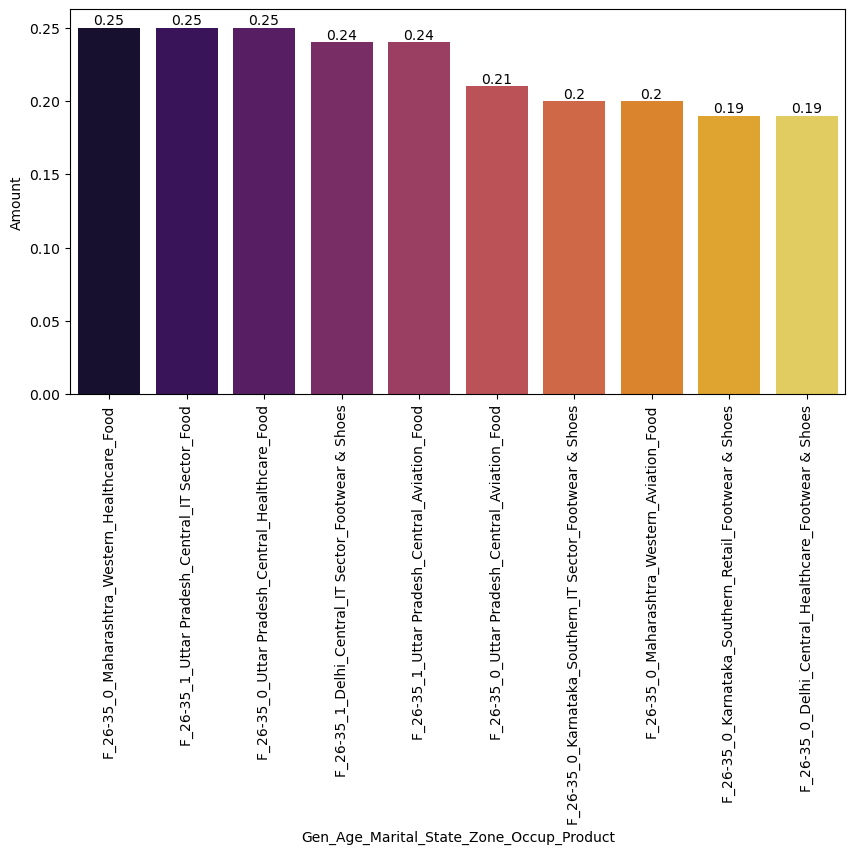

In [516]:
plt.figure(figsize=(10,5)) 
o=sns.barplot(x='Gen_Age_Marital_State_Zone_Occup_Product',y='Amount', data=gen_age_m_s_z_o_p_amt,  palette="inferno")
plt.xticks(rotation=90)
for i in o.containers:
    o.bar_label(i)

### Observation :-
The graph reveals that the highest amount in millions for females in the 26-35 age group, unmarried (0), is from Maharashtra, Western zone, in the Healthcare sector, within the Food product category.

<div class = "alert alert-block alert-danger">
<font color = 'black'><b><i><u><font size = 5>"Final Analysis of Data: Percentage Breakdown by Gender, Age, Marital Status, State, Zone, Occupation, and Product Category"</font></u></i></b></font>
</div>

In [542]:
gen_age_m_s_z_o_p_amt=df.groupby(["Gen_Age_Marital_State_Zone_Occup_Product"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
gen_age_m_s_z_o_p_amt['Amount']=round(gen_age_m_s_z_o_p_amt['Amount']/1000000,2)
gen_age_m_s_z_o_p_amt["%"]=round((gen_age_m_s_z_o_p_amt["Amount"]/sum(gen_age_m_s_z_o_p_amt["Amount"]))*100,2)
gen_age_m_s_z_o_p_amt

,Gen_Age_Marital_State_Zone_Occup_Product,Amount,%
1591,F_26-35_0_Maharashtra_Western_Healthcare_Food,0.25,11.26
2432,F_26-35_1_Uttar Pradesh_Central_IT Sector_Food,0.25,11.26
1735,F_26-35_0_Uttar Pradesh_Central_Healthcare_Food,0.25,11.26
1940,F_26-35_1_Delhi_Central_IT Sector_Footwear & S...,0.24,10.81
2378,F_26-35_1_Uttar Pradesh_Central_Aviation_Food,0.24,10.81
1692,F_26-35_0_Uttar Pradesh_Central_Aviation_Food,0.21,9.46
1403,F_26-35_0_Karnataka_Southern_IT Sector_Footwea...,0.20,9.01
1549,F_26-35_0_Maharashtra_Western_Aviation_Food,0.20,9.01
1419,F_26-35_0_Karnataka_Southern_Retail_Footwear &...,0.19,8.56
1151,F_26-35_0_Delhi_Central_Healthcare_Footwear & ...,0.19,8.56


<div class = "alert alert-block alert-danger">
<font color = 'black'><b><i><u><font size = 5>CONCLUSION :</font></u></i></b></font>
</div>

- <b> The highest amount in millions is observed among females aged 26-35, particularly those who are unmarried.</b>
- <b> Uttar Pradesh and Maharashtra, in their respective zones (Central and Western), show notable data trends.</b>
- <b> The Healthcare sector and Food product category have significant contributions, especially for unmarried females in the 26-35 age group.</b>
- <b> Marital status, age, state, zone, occupation, and product category all play a role in the distribution of amounts across different groups.</b>
- <b> A significant percentage of the total amount is concentrated in the 26-35 age group, with unmarried females in the Healthcare and Food product sectors showing the highest values.</b>

<b><i><font color = "red"><font size = 5> Recommendations :-</i></b>

<b> To generate more revenue in the future, focusing on the 26-35 age group, especially unmarried females, in key sectors like Healthcare and Food products will be crucial. Targeting regions such as Maharashtra and Uttar Pradesh, particularly in the Western and Central zones, could enhance market reach. Strengthening offerings in both the Healthcare and IT sectors, where significant amounts are already concentrated, will likely yield higher returns. Additionally, exploring product diversification and marketing strategies to further tap into these high-performing categories can help boost overall revenue.</b>